In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.preprocessing import normalize, Normalizer
import seaborn as sns

In [3]:
columns = np.array(trainX.columns)
rows = np.array(trainX.T.columns)

In [4]:
rows

array(['x10006_at', 'x10007_at', 'x100129361_at', ..., 'x9994_at',
       'x9997_at', 'x9_at'], dtype=object)

In [5]:
trainX = pd.read_table('http://members.cbio.mines-paristech.fr/~jvert/svn/tutorials/data/breastcancerwang/xtrain.txt',names = columns, index_col=0, low_memory=False)
trainY = pd.read_table('http://members.cbio.mines-paristech.fr/~jvert/svn/tutorials/data/breastcancerwang/ytrain.txt',names= ['label'], index_col=False, low_memory=False)

In [2]:
trainX = pd.read_csv('data/tranX.csv', index_col=0, low_memory=False)
trainY = pd.read_csv('data/tranY.csv')

In [87]:
trainX.head()

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample175,Sample176,Sample177,Sample178,Sample179,Sample180,Sample181,Sample182,Sample183,Sample184
x10006_at,8.44,7.93,7.53,7.72,7.89,8.37,8.18,8.40,8.07,8.16,...,7.52,7.79,7.99,8.40,9.88,7.59,8.67,8.36,8.28,8.71
x10007_at,7.84,8.47,7.49,8.38,7.75,8.43,8.10,7.70,7.89,8.31,...,8.08,8.16,7.87,8.03,8.09,8.92,8.02,7.39,8.78,8.26
x100129361_at,9.23,7.77,9.49,8.03,6.99,8.32,8.94,8.19,7.85,8.31,...,7.05,9.13,7.94,7.89,7.55,8.91,7.66,7.91,9.77,8.16
x100130449_at,2.20,2.48,5.66,5.22,2.20,2.20,2.20,2.34,2.20,5.39,...,2.19,3.01,2.20,2.42,2.20,2.21,2.19,2.20,3.36,2.20
x100130633_at,4.93,6.70,5.99,6.95,7.06,7.02,8.20,6.08,6.97,5.77,...,8.24,6.76,7.48,7.61,7.38,7.20,7.41,6.48,5.79,7.07


In [88]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4654 entries, x10006_at to x9_at
Columns: 184 entries, Sample1 to Sample184
dtypes: float64(184)
memory usage: 6.6+ MB


In [5]:
# saving data
trainX.to_csv('data/tranX.csv')
trainY.to_csv('data/tranY.csv')

In [89]:
trainY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 1 columns):
label    184 non-null int64
dtypes: int64(1)
memory usage: 1.5 KB


In [16]:
trainY.head()

,label
0,-1
1,-1
2,1
3,1
4,-1


In [22]:
trainY.shape

(184, 1)

In [25]:
trainY.count()

label    184
dtype: int64

In [23]:
grp_y = trainY.groupby('label')

In [54]:
import numpy as np

In [14]:
data = trainX.T
data['label'] = np.array(trainY)

In [91]:
data['label'].head()

Sample1   -1
Sample2   -1
Sample3    1
Sample4    1
Sample5   -1
Name: label, dtype: int64

In [92]:
data.head()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at,label
Sample1,8.44,7.84,9.23,2.20,4.93,10.31,7.85,9.91,11.37,3.48,...,11.32,6.37,8.63,8.61,7.42,8.79,4.70,7.23,8.28,-1
Sample2,7.93,8.47,7.77,2.48,6.70,11.03,3.33,9.53,10.91,4.28,...,10.40,5.96,7.61,9.51,8.20,9.27,4.70,6.70,12.78,-1
Sample3,7.53,7.49,9.49,5.66,5.99,8.87,3.48,8.02,10.73,4.07,...,10.57,6.92,8.20,8.71,8.56,8.90,4.70,7.70,12.22,1
Sample4,7.72,8.38,8.03,5.22,6.95,2.73,4.06,9.26,10.90,7.40,...,10.92,5.73,8.44,9.18,7.86,9.30,5.58,7.95,12.18,1
Sample5,7.89,7.75,6.99,2.20,7.06,11.38,3.65,9.22,10.37,3.89,...,10.73,7.45,7.79,9.15,7.97,8.50,4.70,6.63,12.12,-1


In [76]:
type(0) == float

False

In [93]:
for i,x in enumerate(data['x10006_at']):
    if type(x) != float:
        print(i)
        print(x)
        break

In [101]:
corr_mat = data.corr()

In [108]:
corr_lbl = data.corrwith(data['label'])

In [119]:
k = 50
print('negative correlated genes',corr_lbl.sort_values()[:k])
print('positive correlated genes',corr_lbl.sort_values()[-k:])

negative correlated genes x4792_at        -0.258077
x126987_at      -0.254177
x5862_at        -0.250767
x10454_at       -0.248678
x10538_at       -0.244224
x9459_at        -0.243965
x27124_at       -0.243861
x55113_at       -0.242576
x100287025_at   -0.240813
x972_at         -0.239121
x3123_at        -0.239080
x51078_at       -0.233704
x678_at         -0.229025
x7433_at        -0.222145
x64699_at       -0.221549
x11100_at       -0.219425
x8542_at        -0.216286
x6709_at        -0.213008
x3128_at        -0.212878
x10768_at       -0.212173
x27250_at       -0.209507
x2952_at        -0.207352
x10961_at       -0.206650
x3965_at        -0.204061
x3460_at        -0.201900
x3115_at        -0.201792
x5338_at        -0.199995
x50650_at       -0.197500
x54812_at       -0.194294
x2350_at        -0.192357
x2053_at        -0.191678
x4332_at        -0.189239
x6122_at        -0.188276
x23112_at       -0.187812
x23303_at       -0.187461
x4128_at        -0.187362
x4357_at        -0.182422
x5434_at    

In [105]:
# general data correlation heatmap
sns.heatmap(sort_corr_lbl,cmap='YlGnBu',)
#plt.figure(figsize=10)
plt.title('Correlation heatmap')

IndexError: Inconsistent shape between the condition and the input (got (4655, 1) and (4655,))

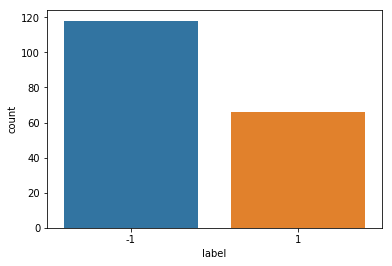

In [97]:
# Now lets check the class distributions
sns.countplot("label",data=data)

In [120]:
data.describe()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at,label
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,8.177011,8.061848,8.200543,2.879457,6.999783,10.059457,3.839783,9.201739,10.927228,4.749837,...,11.070870,5.862935,8.049728,9.535272,8.427446,9.180272,5.161576,7.427174,8.157935,-0.282609
std,0.646031,0.481127,0.750500,1.372735,0.778613,1.825424,0.634312,0.742043,0.415874,1.050290,...,0.501227,1.050994,0.633328,0.424735,0.620824,0.677722,0.733061,0.945051,3.606550,0.961853
min,6.210000,6.490000,5.860000,2.190000,3.710000,2.730000,2.940000,7.110000,9.970000,2.510000,...,9.820000,3.360000,5.750000,8.460000,6.700000,6.350000,4.450000,3.840000,2.480000,-1.000000
25%,7.790000,7.757500,7.802500,2.200000,6.605000,9.502500,3.440000,8.735000,10.670000,4.055000,...,10.737500,5.327500,7.647500,9.270000,8.037500,8.842500,4.700000,6.847500,4.475000,-1.000000
50%,8.105000,8.055000,8.190000,2.200000,7.030000,10.300000,3.730000,9.235000,10.920000,4.575000,...,11.070000,5.790000,8.085000,9.570000,8.460000,9.245000,4.790000,7.475000,8.695000,-1.000000
75%,8.582500,8.350000,8.610000,2.792500,7.492500,11.030000,4.062500,9.592500,11.200000,5.252500,...,11.422500,6.450000,8.442500,9.832500,8.805000,9.625000,5.310000,8.082500,11.522500,1.000000
max,10.000000,9.710000,10.910000,9.490000,8.890000,13.540000,7.850000,12.820000,12.840000,8.550000,...,12.230000,8.640000,9.720000,10.730000,10.330000,11.120000,8.510000,9.750000,13.380000,1.000000


In [122]:
plt.style.use('ggplot')

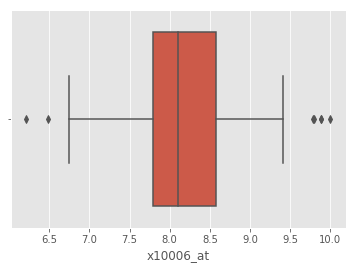

In [123]:
sns.boxplot(data['x10006_at'])

In [535]:
# helper function for ploting box plots for the genes
def box_fearuers(data, fearuers, save_path = 'figuers', file_ext = 'jpg'):
    for f in fearuers:
        sns.boxplot(data[:,f])
        plt.savefig(save_path+'/'+str(f)+'_box_plot_'+file_ext)
        plt.show()

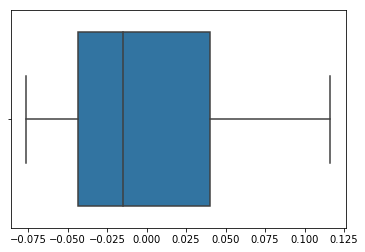

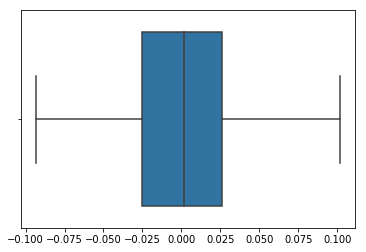

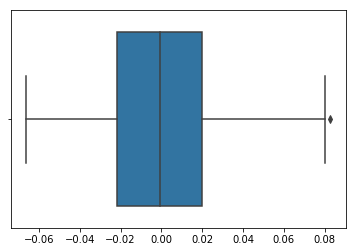

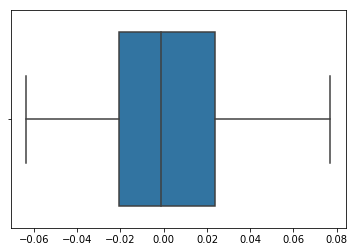

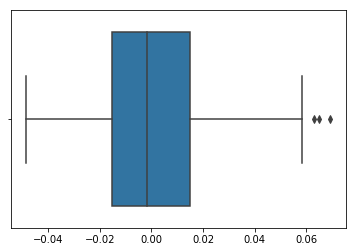

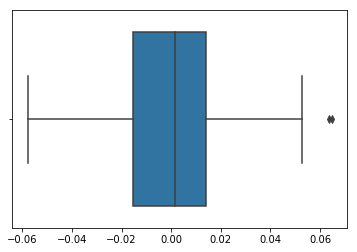

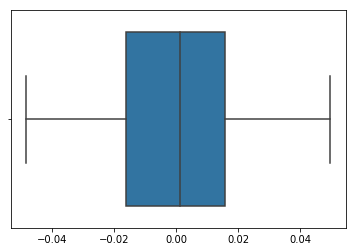

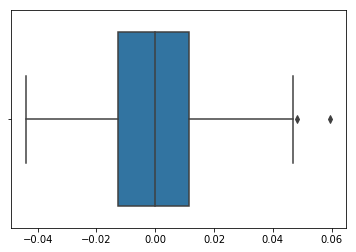

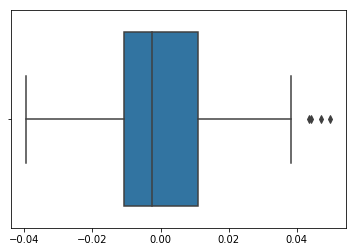

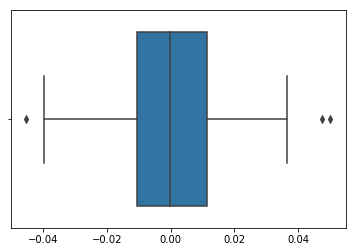

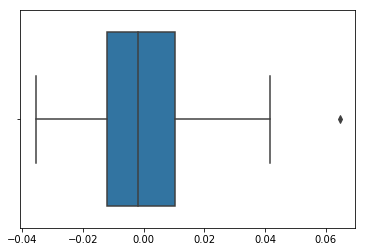

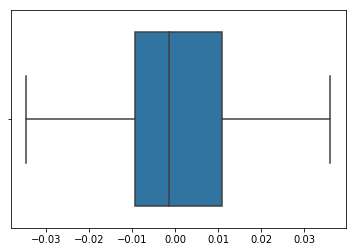

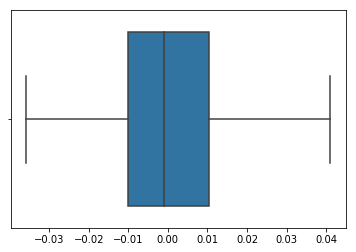

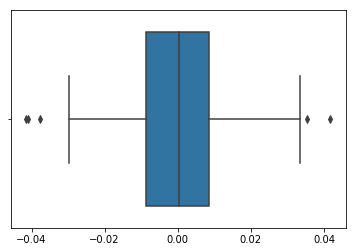

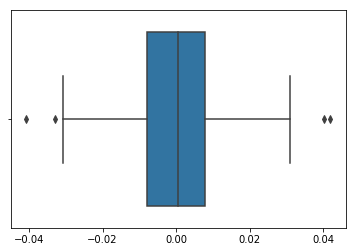

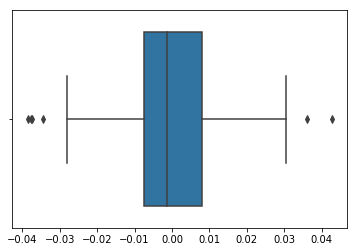

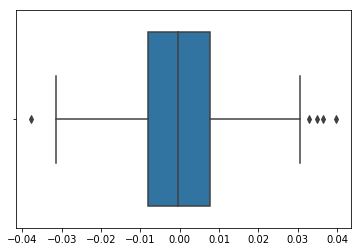

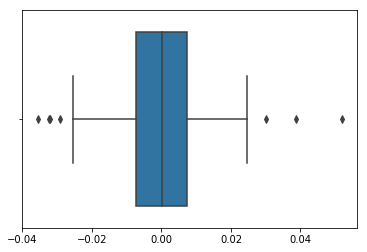

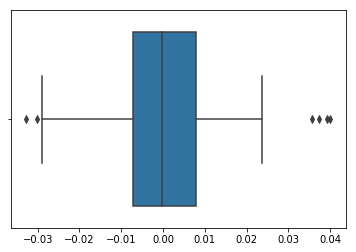

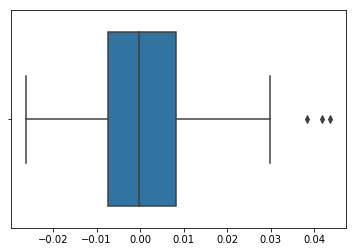

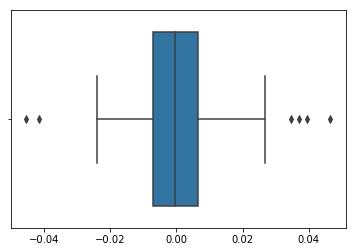

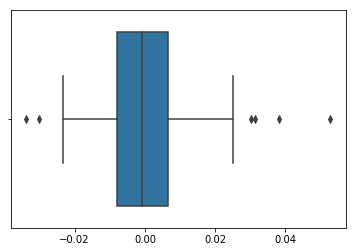

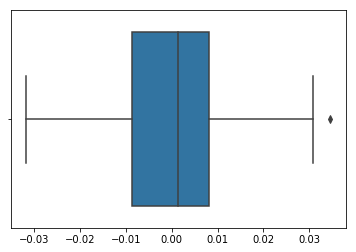

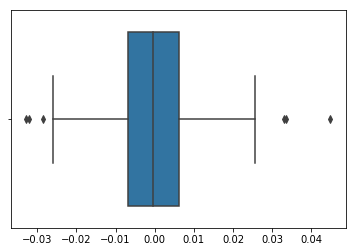

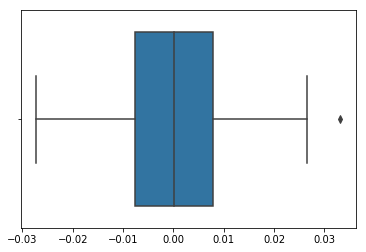

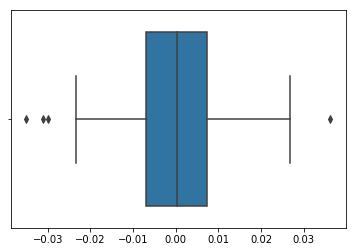

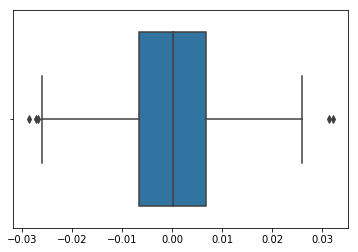

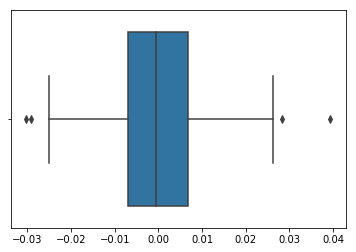

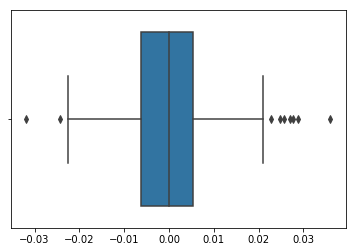

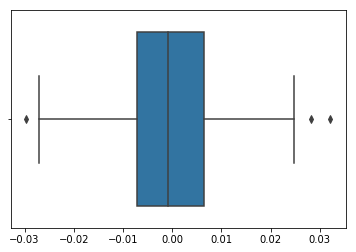

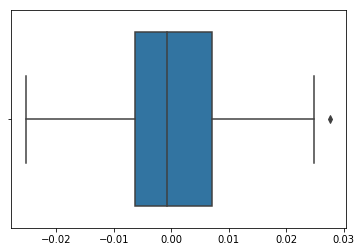

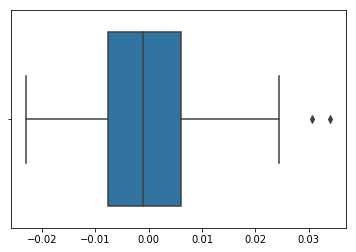

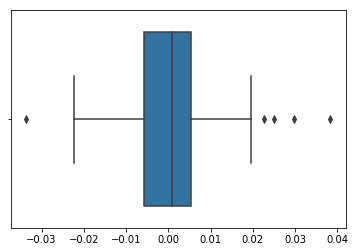

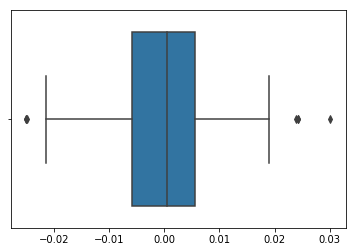

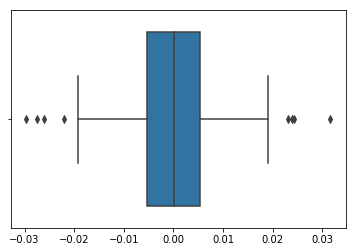

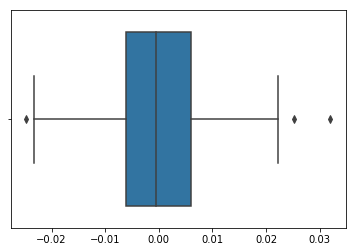

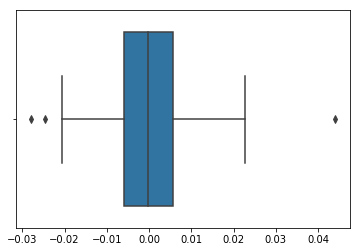

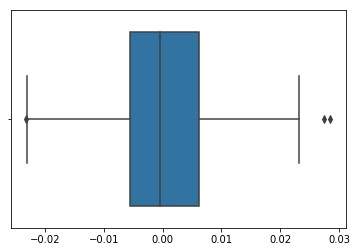

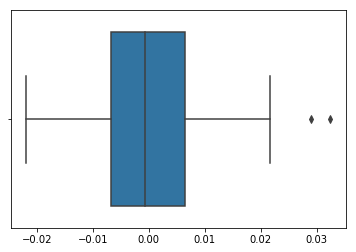

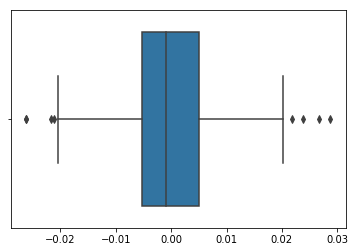

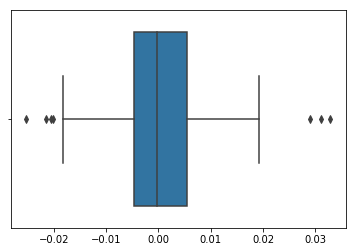

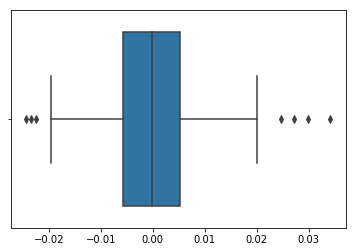

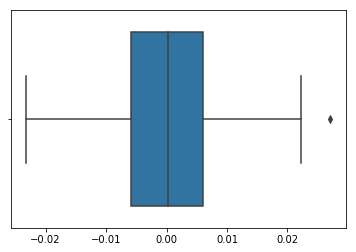

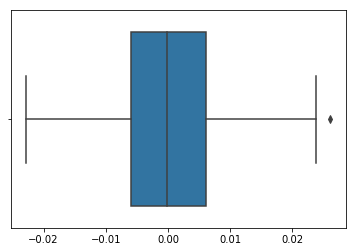

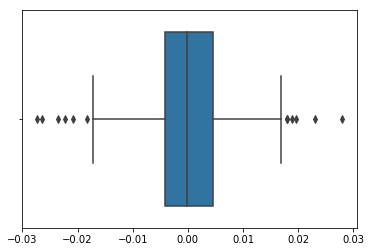

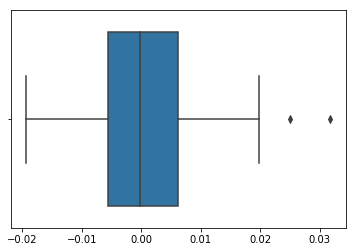

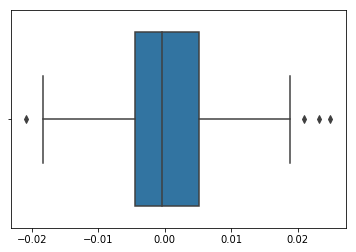

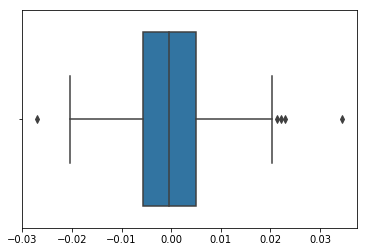

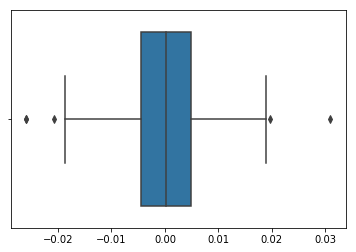

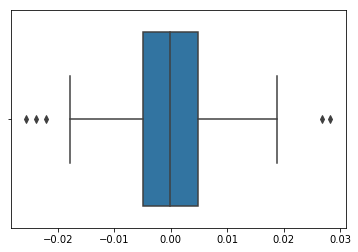

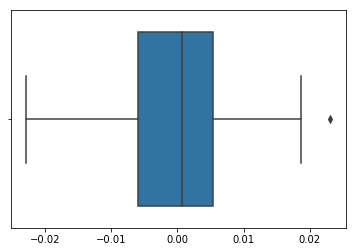

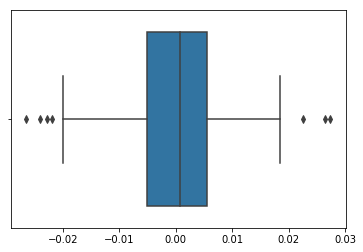

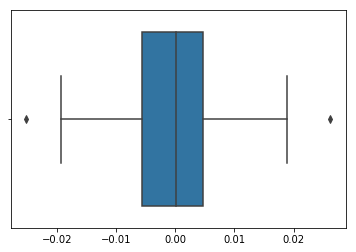

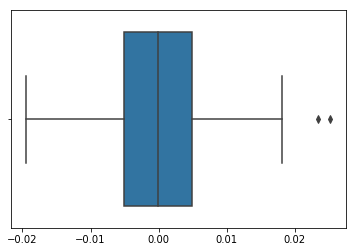

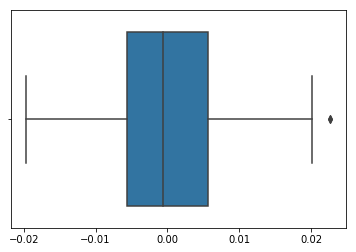

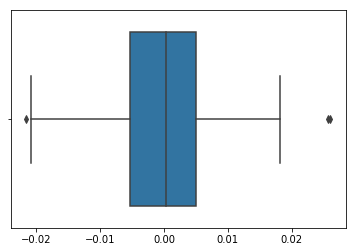

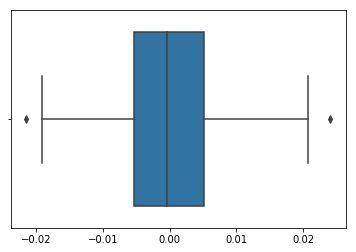

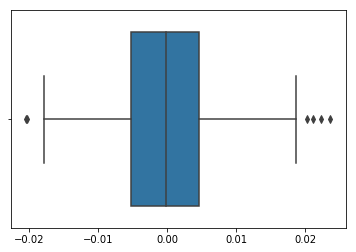

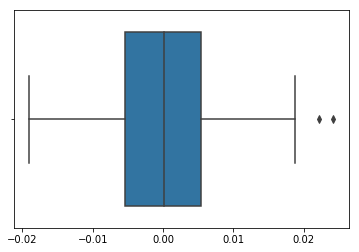

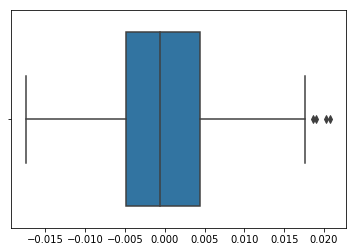

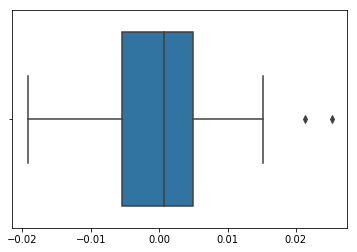

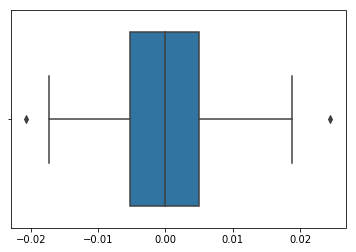

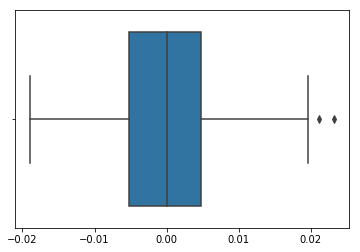

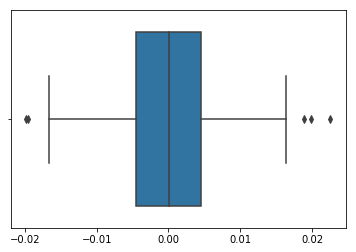

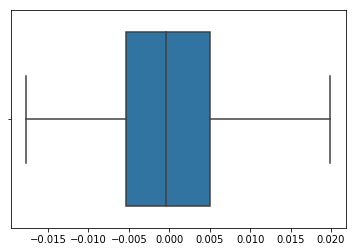

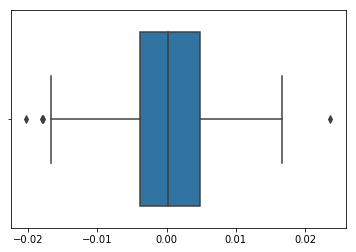

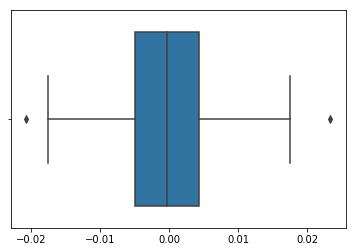

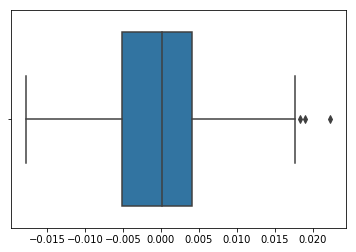

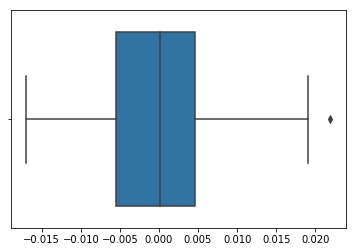

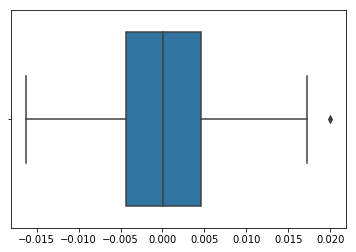

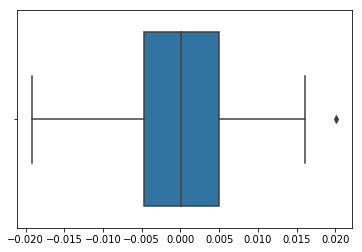

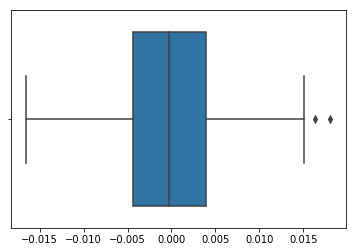

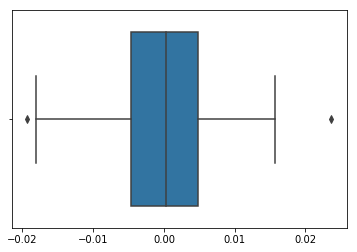

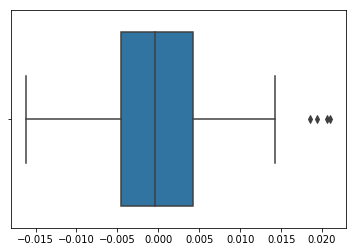

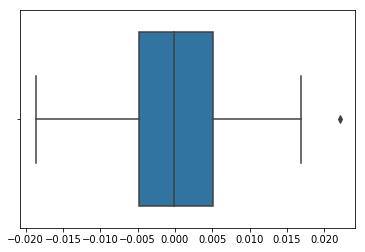

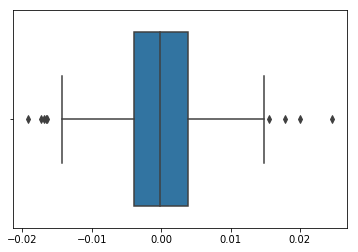

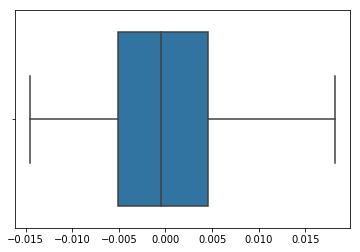

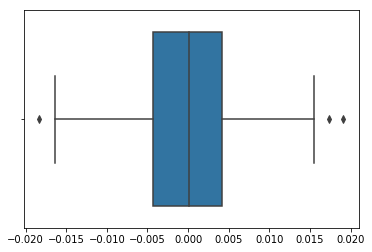

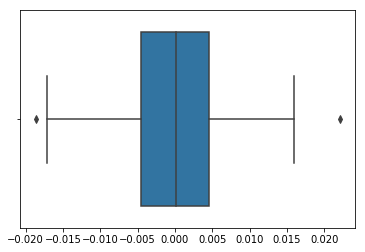

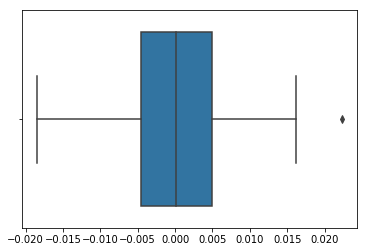

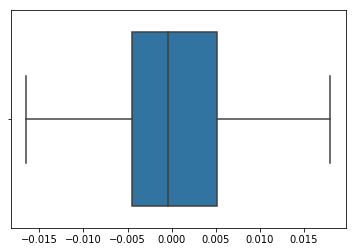

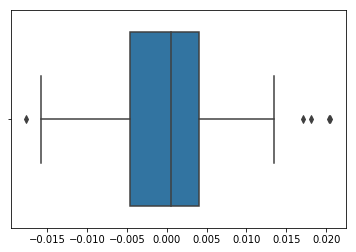

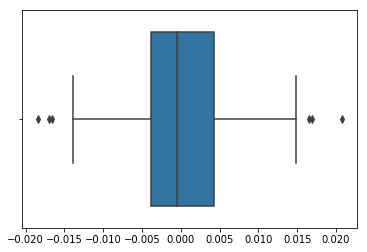

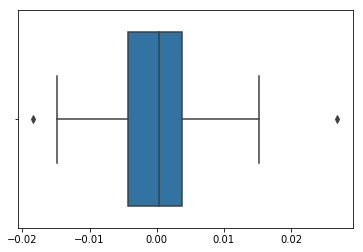

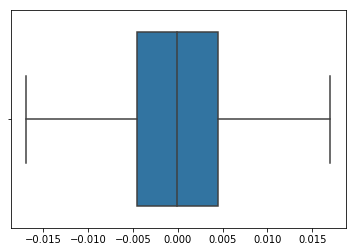

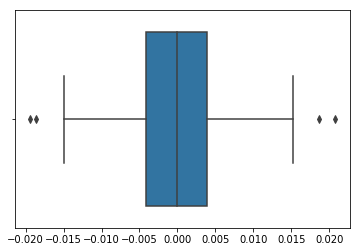

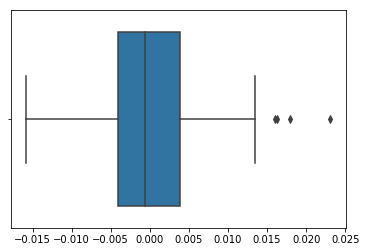

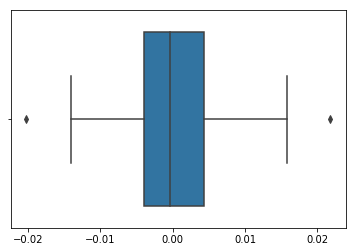

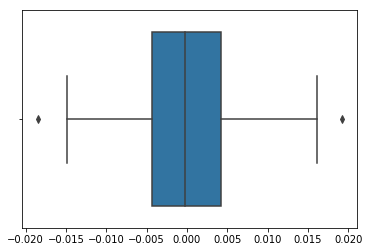

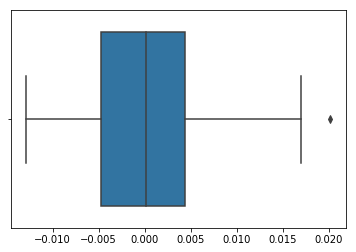

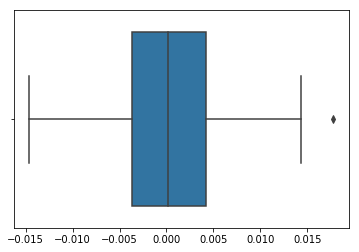

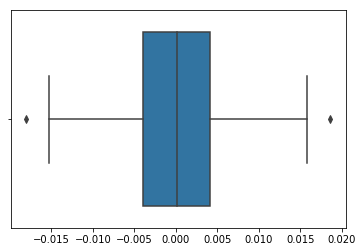

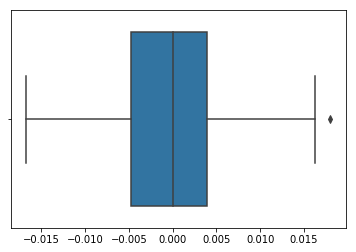

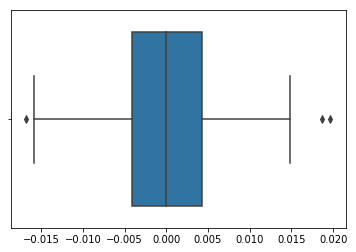

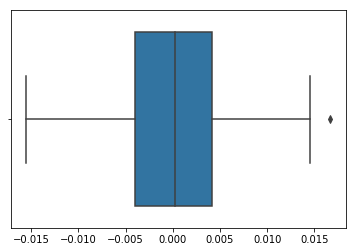

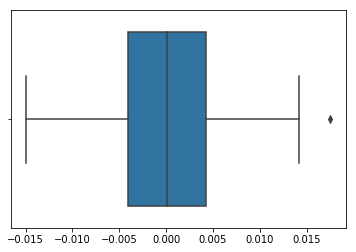

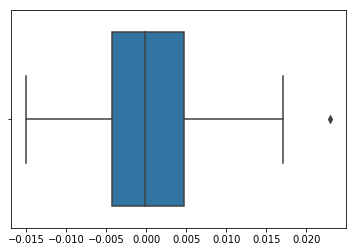

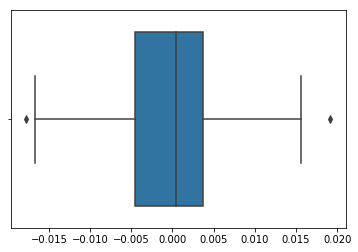

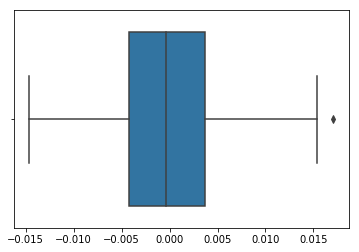

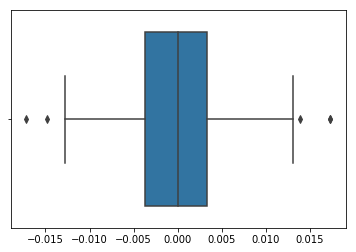

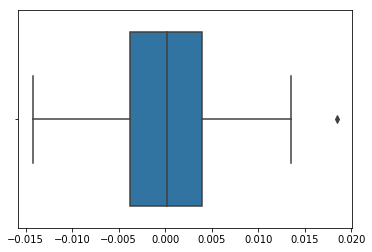

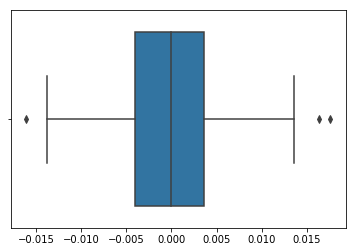

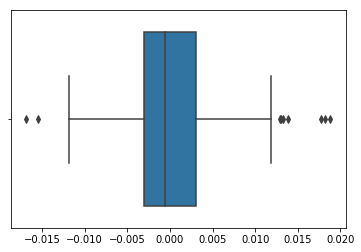

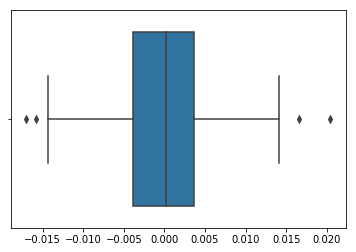

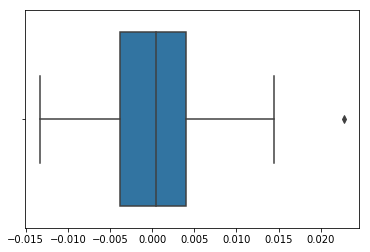

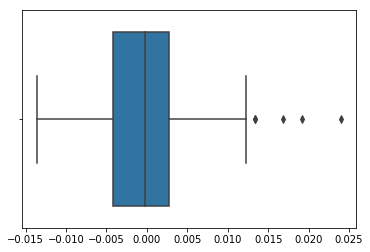

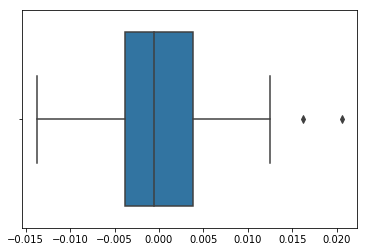

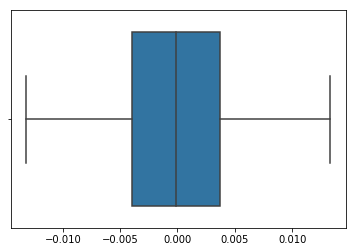

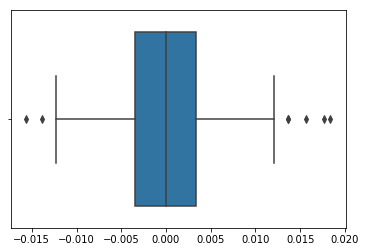

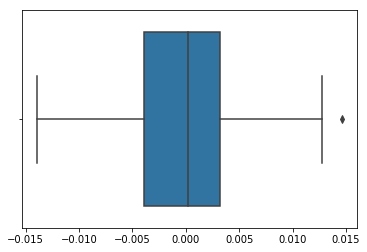

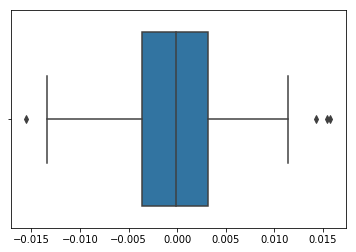

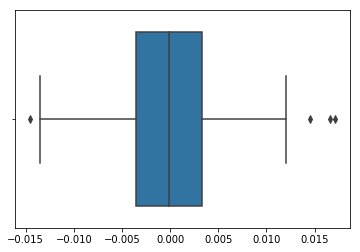

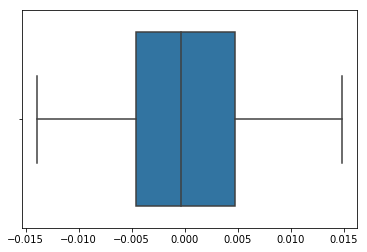

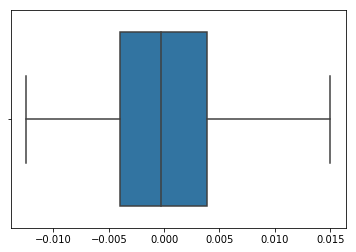

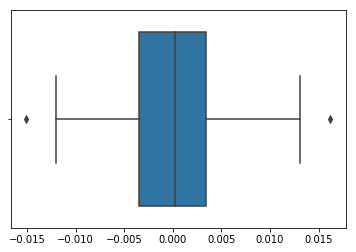

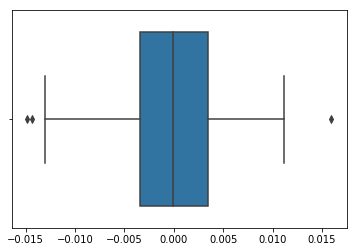

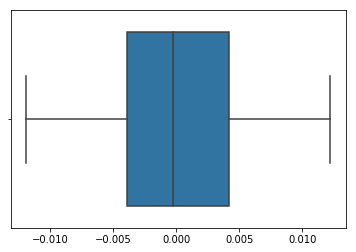

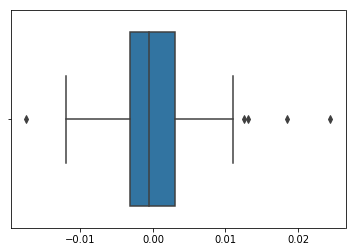

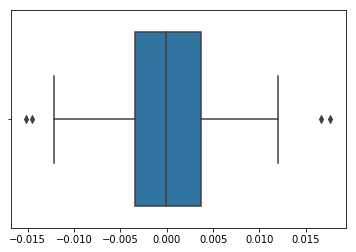

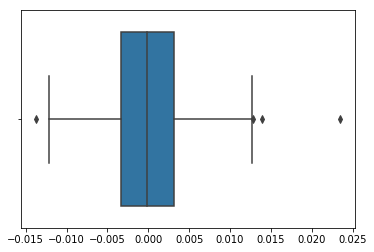

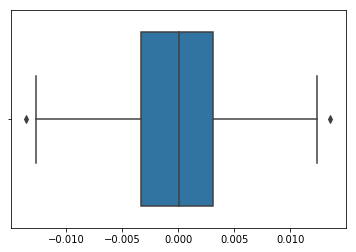

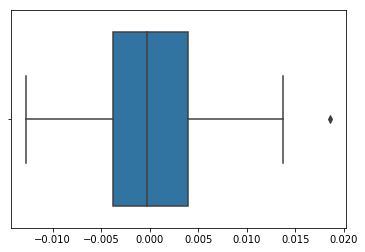

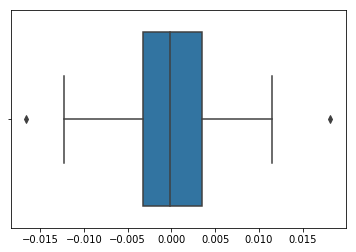

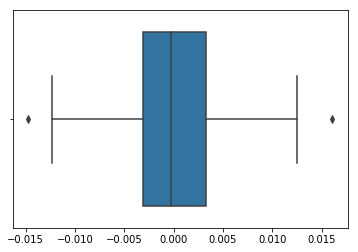

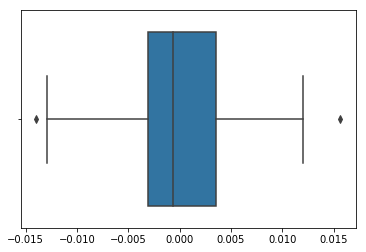

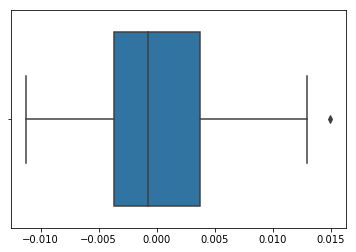

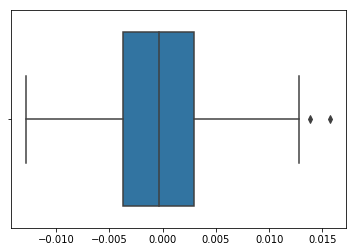

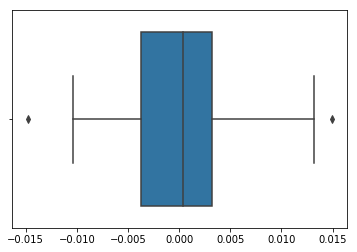

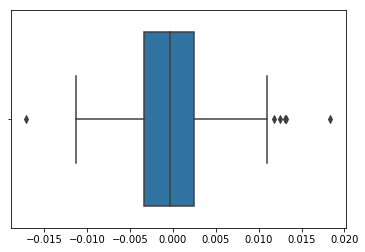

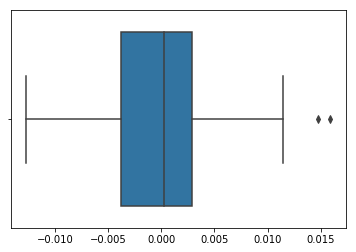

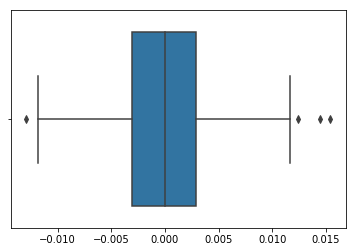

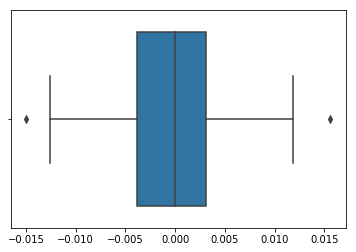

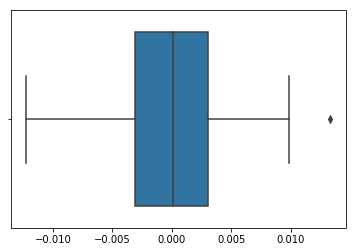

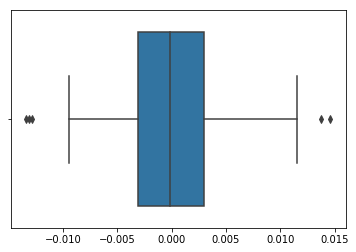

In [548]:
box_fearuers(pca_data, list(range(pca_data.shape[1])))

In [543]:
pca_data = pca.fit_transform(norm_X)#.shape

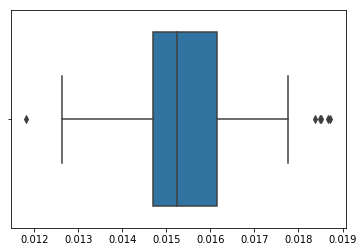

In [534]:
sns.boxplot(norm_X[:,0])

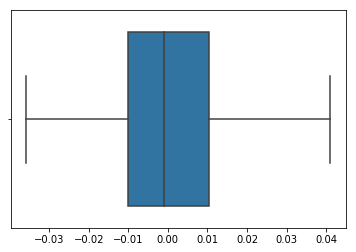

In [547]:
sns.boxplot(pca_data[:,12])

# Clustering

In [508]:
from sklearn.cluster import KMeans

km = KMeans(2)

In [511]:
km.fit(pca_data)
accuracy_score(km.predict(pca_data), Y)

0.22282608695652173

## Dimensionality reduction

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

pca = PCA(0.95)
iso = Isomap()
tsne = TSNE()

In [10]:
pca_data = pca.fit_transform(trainX.T)

In [9]:
len(pca.components_)

134

In [16]:
from scipy.stats.stats import pearsonr

In [27]:
np.corrcoef(data['label'],pca_data[:,10])[0,1]

0.21440687711640963

In [498]:
from sklearn.preprocessing import normalize
norm_X = normalize(trainX.T)

In [499]:
tsne_data = tsne.fit_transform(norm_X)

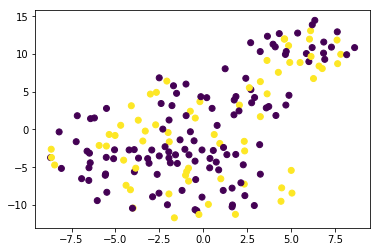

In [31]:
plt.scatter(tsne_data[:,0],tsne_data[:,1], c=trainY['label'])

In [ ]:
# dimensionality reduction ploting 
def dimR_plot(data, dimR_algo, target = 'label' ,sav_path= None):
    
    f, (ax1, ax2, ax3) = plt.subplots(3, 1,)
    f.subplots_adjust(hspace = 0.4, wspace = 0.2)

    ax1.set_title('PCA')
    i = 0
    for color in ['m', 'c']:
        ax1.scatter(pca_data[data[target] == i][:,0], pca_data[data[target] == i][:,1], c=color, s=100, label=target_lbl[i],
                   alpha=0.7, edgecolors='none')
        i+=1
    ax1.legend()   
    #ax1.scatter(pca_data[:,0],pca_data[:,1], c = data['Resp'])

    ax2.set_title('TSNE')
    #ax2.scatter(tsne_data[:,0],tsne_data[:,1], c = data['Resp'])
    i = 0
    for color in ['m', 'c']:
        ax2.scatter(tsne_data[data[target] == i][:,0], tsne_data[data[target] == i][:,1], c=color, s=100, label=target_lbl[i],
                   alpha=0.7, edgecolors='none')
        i+=1
    ax2.legend() 

    ax3.set_title('Isomap')
    #ax3.scatter(iso_data[:,0],iso_data[:,1], c = data['Resp'])
    i = 0
    for color in ['m', 'c']:
        ax3.scatter(iso_data[data[target] == i][:,0], iso_data[data[target] == i][:,1], c=color, s=100, label=target_lbl[i],
                   alpha=0.7, edgecolors='none')
        i+=1
    ax3.legend() 
    if sav_path not None:
        plt.savefig('DR_scatter.jpg')
    plt.show()

In [ ]:
# barplot of the frequency distribution of a categorical feature 
sns.set(rc={'figure.figsize':(11.7,8.27)})
#country_count = cat_data['Country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(feat_imp.values.ravel(),feat_imp.index ,alpha=0.9, palette='Blues_d')

plt.title('Randome Rorest Featuers Importance')
plt.ylabel('Featuers', fontsize=12)
plt.xlabel('Importance score', fontsize=12)
plt.savefig('Importance_score.jpg')
plt.show()

## Modeling

In [ ]:
from sklearn.preprocessing import

In [32]:
from sklearn# import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [6]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True)
print(kf)  

# KFolde training helper function

def KFold_train(X,y,kf,clf, metrics, print_report = False):
    kf.get_n_splits(X)
    n, d = kf.n_splits, len(metrics)
    score = np.zeros((n, d))
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train,y_train)
        pred_y = clf.predict(X_test)
        for metric, j in zip(metrics, range(d)):
            score[i,j] = metric(y_test, pred_y)
            
        if print_report:
            print(classification_report(y_test, pred_y))
            print(score[i,:])
        i+=1
    
    return np.mean(score, axis=0)

def KFold_train_score(X,y,kf,clf, metrics, print_report = False):
    kf.get_n_splits(X)
    n, d = kf.n_splits, len(metrics)
    score = np.zeros((n, d))
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train,y_train)
        pred_y = svm_clf.decision_function(X_test)
        for metric, j in zip(metrics, range(d)):
            score[i,j] = metric(y_test, pred_y)
            
        if print_report:
            print(classification_report(y_test, pred_y))
            print(score[i,:])
        i+=1
    
    return np.mean(score, axis=0)

KFold(n_splits=3, random_state=None, shuffle=True)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier

rf_clf = RandomForestClassifier()
svm_clf = SVC()
logr_clf = LogisticRegressionCV()
gp_clf = GaussianProcessClassifier()
gnb_clf = GaussianNB()
qda_clf = QuadraticDiscriminantAnalysis()
gb_clf = GradientBoostingClassifier()

In [8]:
# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [500]:
X = tsne_data
y = trainY['label']

In [41]:
print('Random Forest:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, rf_clf,[accuracy_score, precision_score, recall_score]))

print('\nSupport Vector Machine:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score]))

print('\nLogistic Regression:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, logr_clf,[accuracy_score, precision_score, recall_score]))

print('\nGaussian Process:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, gp_clf,[accuracy_score, precision_score, recall_score]))

print('\nGaussianNB:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, gnb_clf,[accuracy_score, precision_score, recall_score]))

print('\nQuadratic Discriminant Analysis:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, qda_clf,[accuracy_score, precision_score, recall_score]))

print('\nGradient Boosting Classifier:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, qda_clf,[accuracy_score, precision_score, recall_score]))
KFold_train(X,y,kf, gb_clf,[accuracy_score, precision_score, recall_score])

Random Forest:
 accuracy    precision    recall
[0.59227922 0.38942308 0.24206349]

Support Vector Machine:
 accuracy    precision    recall
[0.66887009 0.58496732 0.29805996]

Logistic Regression:
 accuracy    precision    recall
[0.64137141 0.         0.        ]

Gaussian Process:
 accuracy    precision    recall


/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/merghaney/anaconda3/lib/python3.6/site-p

[0.65767671 0.5519943  0.35641822]

GaussianNB:
 accuracy    precision    recall
[0.5977437  0.07692308 0.04545455]

Quadratic Discriminant Analysis:
 accuracy    precision    recall
[0.64154768 0.33333333 0.03269537]

Gradient Boosting Classifier:
 accuracy    precision    recall
[0.60893707 0.08333333 0.04761905]


array([0.60285563, 0.43915344, 0.41691919])

In [44]:
from sklearn.metrics import roc_auc_score

In [54]:
print('Random Forest:')
print('roc_auc_score')
print(KFold_train(X,y,kf, rf_clf,[roc_auc_score]))

print('\nSupport Vector Machine:')
print(' roc_auc_score')
print(KFold_train(X,y,kf, svm_clf,[roc_auc_score]))

print('\nLogistic Regression:')
print(' roc_auc_score')
print(KFold_train(X,y,kf, logr_clf,[roc_auc_score]))

print('\nGaussian Process:')
print('roc_auc_score')
print(KFold_train(X,y,kf, gp_clf,[roc_auc_score]))

print('\nGaussianNB:')
print(' roc_auc_score')
print(KFold_train(X,y,kf, gnb_clf,[roc_auc_score]))

print('\nQuadratic Discriminant Analysis:')
print(' roc_auc_score')
print(KFold_train(X,y,kf, qda_clf,[roc_auc_score]))

print('\nGradient Boosting Classifier:')
print('roc_auc_score')
print(KFold_train(X,y,kf, gb_clf,[roc_auc_score]))

Random Forest:
roc_auc_score
[0.62713201]

Support Vector Machine:
 roc_auc_score
[0.61415159]

Logistic Regression:
 roc_auc_score
[0.48015873]

Gaussian Process:
roc_auc_score
[0.49652873]

GaussianNB:
 roc_auc_score
[0.49579125]

Quadratic Discriminant Analysis:
 roc_auc_score


/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/merghaney/anaconda3/lib/python3.6/site-p

[0.50095177]

Gradient Boosting Classifier:
roc_auc_score
[0.55392874]


In [55]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()

In [56]:
print(KFold_train(X,y,kf, ada_clf,[roc_auc_score]))

[0.66368134]


In [57]:
print(KFold_train(X,y,kf, ada_clf,[accuracy_score, precision_score, recall_score]))

[0.6521241  0.51217532 0.40749106]


## SVM tuning 

In [59]:
svm_clf = SVC(kernel='poly', degree= 6)
print(KFold_train(X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score]))

/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precis

[0.63088313 0.08333333 0.01960784]


In [211]:
np.linspace(1e-5, 10,100)

array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e+00, 1.41415e+00,
       1.51516e+00, 1.61617e+00, 1.71718e+00, 1.81819e+00, 1.91920e+00,
       2.02021e+00, 2.12122e+00, 2.22223e+00, 2.32324e+00, 2.42425e+00,
       2.52526e+00, 2.62627e+00, 2.72728e+00, 2.82829e+00, 2.92930e+00,
       3.03031e+00, 3.13132e+00, 3.23233e+00, 3.33334e+00, 3.43435e+00,
       3.53536e+00, 3.63637e+00, 3.73738e+00, 3.83839e+00, 3.93940e+00,
       4.04041e+00, 4.14142e+00, 4.24243e+00, 4.34344e+00, 4.44445e+00,
       4.54546e+00, 4.64647e+00, 4.74748e+00, 4.84849e+00, 4.94950e+00,
       5.05051e+00, 5.15152e+00, 5.25253e+00, 5.35354e+00, 5.45455e+00,
       5.55556e+00, 5.65657e+00, 5.75758e+00, 5.85859e+00, 5.95960e+00,
       6.06061e+00, 6.16162e+00, 6.26263e+00, 6.36364e+00, 6.46465e+00,
       6.56566e+00, 6.66667e+00, 6.76768e+00, 6.86869e+00, 6.969

In [212]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = np.linspace(1e-5, 10,100) #[0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    
    grid_search.best_params_
    return grid_search.best_params_

In [192]:
X = tsne_data #np.array(trainX.T)
y = trainY['label']

In [213]:
svc_param_selection(X,y,2)

{'C': 1e-05, 'gamma': 0.001}

In [501]:
# np.random.seed(42)
svm_clf = SVC(gamma=0.0003)
print(KFold_train(X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score]))

[0.64145955 0.         0.        ]


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.


In [200]:
from sklearn.neighbors import KNeighborsClassifier

In [302]:
np.random.seed(42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
print(KFold_train(X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score]))

[0.6027675  0.48412698 0.4424183 ]


In [111]:
from mklaren.kernel.kinterface import Kinterface
from mklaren.kernel.kernel import rbf_kernel

In [ ]:
Matern()

In [112]:
from mklaren.kernel.kernel import linear_kernel, poly_kernel, matern_kernel
K_exp  = Kinterface(data=X, kernel=rbf_kernel,  kernel_args={"sigma": 0.0003}) # RBF kernel 
K_poly = Kinterface(data=X, kernel=poly_kernel, kernel_args={"b": 3})      # polynomial kernel with degree=3
K_lin  = Kinterface(data=X, kernel=linear_kernel)                          # linear kernel
K_mat  = Kinterface(data=X, kernel=matern_kernel)

# model = RidgeLowRank(method="nystrom", rank=5, lbd=1)
# model.fit([K_exp, K_lin, K_poly], y_tr)
# yp = model.predict([X_te, X_te, X_te])                     # The features passed to each kernel
# rmse = np.var(y_tr-yp)**0.5
# print("Test RMSE:", rmse)

NameError: name 'X' is not defined

In [703]:
# mu = model.mu
combined_kernel = lambda x, y: \
    1 * K_exp(x, y) + -3 * K_lin(x, y) + 0.5 * K_poly(x, y) + K_mat(x,y)
    
combined_kernel(np.array([0, 1, 2]), np.array([2, 1, 0]), )

array([[5.13973135, 5.48335772, 6.        ],
       [5.48335772, 6.        , 5.48335772],
       [6.        , 5.48335772, 5.13973135]])

In [485]:
svm_clf = SVC(kernel=combined_kernel)
print(roubst_KCV(5,X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score]))

(array([0.6130795 , 0.46478513, 0.42149793]), array([0.02070566, 0.03225974, 0.03713407]))


## Baysean optimization for kernels parameters

In [672]:
def black_box_function(alph, beta, epsolon, psi):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    combined_kernel = lambda x, y: \
    alph * K_exp(x, y) + beta * K_lin(x, y) + epsolon * K_poly(x, y) + psi * K_mat(x, y)
    
    svm_clf = SVC(kernel=combined_kernel)
    #np.random.seed(42)
    m, std = roubst_KCV(5,X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score])
#     m, std = KFold_train_score(X,Y_train, kf, svm_clf,[roc_auc_score])
    return m[0] + std[0]/2

In [428]:
Y_train = Y

In [684]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'alph': (0, 5), 'beta': (0, 5),'epsolon':(0,5), 'psi' : (0,5)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

In [757]:
# np.random.seed(42)
kf = KFold(n_splits=3, shuffle=True)
print(kf)  

# KFolde training helper function

def KFold_train(X,Y_train,kf,clf, metrics, print_report = False):
    kf.get_n_splits(X)
    n, d = kf.n_splits, len(metrics)
    score = np.zeros((n, d))
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]
        
        clf.fit(X_train,y_train)
        pred_y = clf.predict(X_test)
        for metric, j in zip(metrics, range(d)):
            score[i,j] = metric(y_test, pred_y)
            
        if print_report:
            print(classification_report(y_test, pred_y))
            print(score[i,:])
        i+=1
    
    return np.mean(score, axis=0)

def KFold_train_score(X, Y_train,kf,clf, metrics, print_report = False):
    kf.get_n_splits(X)
    n, d = kf.n_splits, len(metrics)
    score = np.zeros((n, d))
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]
        print(X_train.shape)
        print(X_test.shape)
        clf.fit(X_train,y_train)
        pred_y = svm_clf.decision_function(X_test)
        for metric, j in zip(metrics, range(d)):
            score[i,j] = metric(y_test, pred_y)
            
        if print_report:
            print(classification_report(y_test, pred_y))
            print(score[i,:])
        i+=1
    
    return np.mean(score, axis=0)


def roubst_KCV(n_rand, X,Y_train,kf,clf, metrics, print_report = False):
    d = len(metrics)
    roubst_score = np.zeros((n_rand, d))
    for n in range(n_rand):
        roubst_score[n,:] = KFold_train(X,Y_train,kf,clf, metrics, print_report = False)
    return np.mean(roubst_score, axis=0), np.std(roubst_score, axis=0)

def roubst_KCV_score(n_rand, X,Y_train,kf,clf, metrics, print_report = False):
    d = len(metrics)
    roubst_score = np.zeros((n_rand, d))
    for n in range(n_rand):
        roubst_score[n,:] = KFold_train_score(X,Y_train,kf,clf, metrics, print_report = False)
    return np.mean(roubst_score, axis=0), np.std(roubst_score, axis=0)

KFold(n_splits=3, random_state=None, shuffle=True)


In [503]:
# with matern
optimizer.maximize(
    init_points=4,
   n_iter=50,
)

|   iter    |  target   |   alph    |   beta    |  epsolon  |    psi    |
-------------------------------------------------------------------------
|  1        |  0.5572   | -0.8298   |  4.406    | -9.998    | -3.953    |
|  2        |  0.5782   | -3.532    | -8.153    | -6.275    | -3.089    |
|  3        |  0.5906   | -1.032    |  0.7763   | -1.616    |  3.704    |
|  4        |  0.5846   | -2.955    |  7.562    | -9.452    |  3.409    |
|  5        |  0.5601   |  5.0      | -10.0     | -10.0     |  10.0     |
|  6        |  0.5668   | -4.926    | -6.931    |  9.912    |  9.738    |
|  7        |  0.5493   | -5.0      |  10.0     |  10.0     | -10.0     |
|  8        |  0.5974   |  5.0      |  10.0     |  10.0     |  10.0     |
|  9        |  0.5465   |  5.0      | -10.0     |  10.0     | -10.0     |
|  10       |  0.5858   | -5.0      |  10.0     |  10.0     |  10.0     |
|  11       |  0.5472   |  4.608    |  9.406    | -5.859    |  9.886    |
|  12       |  0.5635   | -4.997    | 

 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.


|  37       |  0.6188   | -4.968    | -9.89     |  1.832    | -0.3594   |


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.


|  38       |  0.5787   | -4.832    | -9.971    |  9.234    |  2.754    |
|  39       |  0.5276   | -5.0      | -10.0     |  0.2575   | -10.0     |


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.


|  40       |  0.6265   | -5.0      | -2.137    |  2.736    |  0.84     |
|  41       |  0.5391   |  4.678    |  9.965    | -9.729    |  1.32     |
|  42       |  0.5543   | -4.947    | -9.975    | -0.5764   |  6.961    |
|  43       |  0.5616   |  5.0      | -10.0     | -10.0     |  2.024    |
|  44       |  0.5616   | -4.816    |  3.06     |  4.495    | -2.454    |
|  45       |  0.5439   | -4.856    |  9.874    | -0.6548   |  8.301    |
|  46       |  0.5082   |  4.988    | -5.688    |  0.3066   | -2.687    |
|  47       |  0.6004   |  5.0      |  10.0     |  1.542    |  3.158    |


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.


|  48       |  0.6273   | -4.84     | -3.593    |  9.973    |  0.687    |


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.


|  49       |  0.6031   | -4.973    | -4.707    |  3.228    |  3.45     |
|  50       |  0.548    | -4.96     | -5.476    | -0.01527  | -1.971    |
|  51       |  0.5655   | -5.0      | -10.0     | -10.0     |  0.9582   |
|  52       |  0.5746   | -5.0      | -0.04845  | -10.0     | -10.0     |
|  53       |  0.56     |  5.0      |  10.0     | -1.118    | -10.0     |
|  54       |  0.546    |  5.0      |  1.477    | -6.553    | -10.0     |


In [507]:
print(optimizer.max['params'])
combined_kernel = lambda x, y: \
    optimizer.max['params']['alph'] * K_exp(x, y) + optimizer.max['params']['beta'] * K_lin(x, y) + optimizer.max['params']['epsolon'] * K_poly(x, y) + \
    optimizer.max['params']['psi'] * K_mat(x, y)
# np.random.seed(42)
svm_clf = SVC(kernel=combined_kernel)
print(roubst_KCV(5,X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score, f1_score]))
print(roubst_KCV_score(5,X,Y_train, kf, svm_clf,[roc_auc_score]))

{'alph': -4.839671492022945, 'beta': -3.5930026687936856, 'epsolon': 9.97310236636256, 'psi': 0.6870225840682194}


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:F-score is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:F-score is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.

(array([0.60874317, 0.31375661, 0.09480611, 0.1305967 ]), array([0.01943318, 0.1633264 , 0.03522481, 0.05674551]))
(array([0.51397211]), array([0.02103139]))


In [352]:
optimizer.maximize(
    init_points=3,
   n_iter=50,
)

|   iter    |  target   |   alph    |   beta    |  epsolon  |
-------------------------------------------------------------
|  1        |  0.5435   |  2.085    |  4.406    | -9.998    |
|  2        |  0.5707   |  1.512    | -7.065    | -8.153    |
|  3        |  0.5326   |  0.9313   | -3.089    | -2.065    |
|  4        |  0.5542   |  5.0      | -10.0     | -10.0     |
|  5        |  0.533    |  0.0      | -10.0     | -10.0     |
|  6        |  0.6249   |  5.0      | -10.0     |  10.0     |
|  7        |  0.5706   |  5.0      |  10.0     |  10.0     |
|  8        |  0.6032   |  5.0      | -0.9598   |  10.0     |
|  9        |  0.6197   |  0.0      | -10.0     |  10.0     |
|  10       |  0.6415   |  0.0      |  10.0     |  10.0     |
|  11       |  0.6085   |  0.0      |  3.134    |  10.0     |
|  12       |  0.5109   |  0.0      |  10.0     | -10.0     |
|  13       |  0.5599   |  0.0      | -5.105    |  10.0     |
|  14       |  0.6686   |  0.0      |  10.0     |  2.781    |
|  15   

In [305]:
print(optimizer.max)

{'target': 0.6307068570421294, 'params': {'alph': 0.0, 'beta': 3.1180563874283287, 'epsolon': -10.0}}


In [353]:
print(optimizer.max)

{'target': 0.6686056760091663, 'params': {'alph': 0.0, 'beta': 10.0, 'epsolon': 2.7813406302456367}}


In [385]:
print(optimizer.max['params'])
combined_kernel = lambda x, y: \
    optimizer.max['params']['alph'] * K_exp(x, y) + optimizer.max['params']['beta'] * K_lin(x, y) + optimizer.max['params']['epsolon'] * K_poly(x, y)
# np.random.seed(42)
svm_clf = SVC(kernel=combined_kernel)
print(KFold_train(X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score, f1_score]))

{'alph': 0.0, 'beta': 10.0, 'epsolon': 2.7813406302456367}
[0.6027675  0.48412698 0.4424183  0.44548706]


In [371]:
from sklearn.metrics import f1_score

In [382]:
print(optimizer.max['params'])
combined_kernel = lambda x, y: \
    optimizer.max['params']['alph'] * K_exp(x, y) + optimizer.max['params']['beta'] * K_lin(x, y) + optimizer.max['params']['epsolon'] * K_poly(x, y)
# np.random.seed(42)
svm_clf = SVC(kernel=combined_kernel)
print(KFold_train_score(X,Y_train, kf, svm_clf,[roc_auc_score]))

{'alph': 0.0, 'beta': 10.0, 'epsolon': 2.7813406302456367}
[0.64028299]


In [295]:
optimizer.maximize(
    init_points=3,
   n_iter=100,
)

|   iter    |  target   |   alph    |   beta    |  epsolon  |
-------------------------------------------------------------
|  14       |  0.538    |  2.694    | -1.616    | -10.0     |
|  15       |  0.5545   |  1.022    |  7.562    | -10.0     |
|  16       |  0.5544   |  3.352    | -1.654    | -10.0     |
|  17       |  0.549    |  2.099    |  10.0     | -10.0     |
|  18       |  0.5383   |  5.0      | -0.2632   | -10.0     |
|  19       |  0.5383   |  3.336    |  3.05     | -10.0     |
|  20       |  0.4835   |  0.0      | -6.297    | -10.0     |
|  21       |  0.5376   |  2.213    | -10.0     | -10.0     |
|  22       |  0.5161   |  5.0      |  4.51     | -10.0     |
|  23       |  0.5274   |  3.037    | -4.143    | -10.0     |
|  24       |  0.5598   |  1.511    |  5.58     | -10.0     |
|  25       |  0.5546   |  1.3      |  3.418    | -10.0     |
|  26       |  0.5155   |  0.000345 |  8.469    | -10.0     |
|  27       |  0.5329   |  5.0      | -6.806    | -10.0     |
|  28   

KeyboardInterrupt: 

## Featuers Importance

In [552]:
trainX.head()

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample175,Sample176,Sample177,Sample178,Sample179,Sample180,Sample181,Sample182,Sample183,Sample184
x10006_at,8.44,7.93,7.53,7.72,7.89,8.37,8.18,8.40,8.07,8.16,...,7.52,7.79,7.99,8.40,9.88,7.59,8.67,8.36,8.28,8.71
x10007_at,7.84,8.47,7.49,8.38,7.75,8.43,8.10,7.70,7.89,8.31,...,8.08,8.16,7.87,8.03,8.09,8.92,8.02,7.39,8.78,8.26
x100129361_at,9.23,7.77,9.49,8.03,6.99,8.32,8.94,8.19,7.85,8.31,...,7.05,9.13,7.94,7.89,7.55,8.91,7.66,7.91,9.77,8.16
x100130449_at,2.20,2.48,5.66,5.22,2.20,2.20,2.20,2.34,2.20,5.39,...,2.19,3.01,2.20,2.42,2.20,2.21,2.19,2.20,3.36,2.20
x100130633_at,4.93,6.70,5.99,6.95,7.06,7.02,8.20,6.08,6.97,5.77,...,8.24,6.76,7.48,7.61,7.38,7.20,7.41,6.48,5.79,7.07


In [570]:
trainX.transpose().head()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
Sample1,8.44,7.84,9.23,2.20,4.93,10.31,7.85,9.91,11.37,3.48,...,7.71,11.32,6.37,8.63,8.61,7.42,8.79,4.70,7.23,8.28
Sample2,7.93,8.47,7.77,2.48,6.70,11.03,3.33,9.53,10.91,4.28,...,9.98,10.40,5.96,7.61,9.51,8.20,9.27,4.70,6.70,12.78
Sample3,7.53,7.49,9.49,5.66,5.99,8.87,3.48,8.02,10.73,4.07,...,8.34,10.57,6.92,8.20,8.71,8.56,8.90,4.70,7.70,12.22
Sample4,7.72,8.38,8.03,5.22,6.95,2.73,4.06,9.26,10.90,7.40,...,9.05,10.92,5.73,8.44,9.18,7.86,9.30,5.58,7.95,12.18
Sample5,7.89,7.75,6.99,2.20,7.06,11.38,3.65,9.22,10.37,3.89,...,9.16,10.73,7.45,7.79,9.15,7.97,8.50,4.70,6.63,12.12


In [579]:
features.shape

(1600, 20)

In [578]:
labels.shape

(1600,)

In [576]:
trainX.transpose().values

array([[ 8.44,  7.84,  9.23, ...,  4.7 ,  7.23,  8.28],
       [ 7.93,  8.47,  7.77, ...,  4.7 ,  6.7 , 12.78],
       [ 7.53,  7.49,  9.49, ...,  4.7 ,  7.7 , 12.22],
       ...,
       [ 8.36,  7.39,  7.91, ...,  7.26,  8.25,  3.  ],
       [ 8.28,  8.78,  9.77, ...,  4.78,  7.11,  3.  ],
       [ 8.71,  8.26,  8.16, ...,  4.96,  6.32, 12.99]])

In [581]:
trainY.values.reshape(-1,).shape

(184,)

In [ ]:
TuRF()

In [10]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate.turf import TuRF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# genetic_data = pd.read_csv('https://github.com/EpistasisLab/scikit-rebate/raw/master/data/'
#                            'GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.tsv.gz',
#                            sep='\t', compression='gzip')

# features, labels = genetic_data.drop('class', axis=1).values, genetic_data['class'].values

features, labels = trainX.transpose().values, trainY.values.reshape(-1,)
headers = list(rows) #list(genetic_data.drop("class", axis=1))

fs = TuRF(core_algorithm="ReliefF", n_features_to_select=20, pct=0.5,verbose=True)
fs.fit(features, labels, headers)

# for feature_name, feature_score in zip(genetic_data.drop('class', axis=1).columns, fs.feature_importances_):
#     print(feature_name, '\t', feature_score)

Created distance array in 0.2786848545074463 seconds.
Feature scoring under way ...
Completed scoring in 174.7582986354828 seconds.
Created distance array in 0.12848448753356934 seconds.
Feature scoring under way ...
Completed scoring in 86.9827835559845 seconds.
Created distance array in 0.05982398986816406 seconds.
Feature scoring under way ...
Completed scoring in 44.201398849487305 seconds.


TuRF(core_algorithm='ReliefF', discrete_threshold=10, n_features_to_select=20,
   n_jobs=1, n_neighbors=100, pct=0.5, verbose=True)

In [583]:
genetic_data.drop('class', axis=1).columns

Index(['N0', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10',
       'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'P1', 'P2'],
      dtype='object')

In [584]:
for feature_name, feature_score in zip(rows, fs.feature_importances_):
    print(feature_name, '\t', feature_score)

x10006_at 	 0.005311737971002167
x10007_at 	 0.005311737971002167
x100129361_at 	 0.005311737971002167
x100130449_at 	 0.006100878499106611
x100130633_at 	 0.005311737971002167
x100133941_at 	 0.005674229261995705
x10014_at 	 0.005311737971002167
x10016_at 	 0.005311737971002167
x100188893_at 	 0.005674229261995705
x10019_at 	 0.005311737971002167
x1001_at 	 0.014495035048394734
x10020_at 	 0.005311737971002167
x10026_at 	 0.005311737971002167
x100272147_at 	 0.005311737971002167
x100287025_at 	 0.015656521329961776
x100287552_at 	 0.005311737971002167
x100288214_at 	 0.005311737971002167
x100288939_at 	 0.013570641788033086
x100289367_at 	 0.005311737971002167
x100289563_at 	 0.007443853522856701
x10038_at 	 0.008635929404488053
x1003_at 	 0.005311737971002167
x10040_at 	 0.010359424234909853
x10042_at 	 0.009541648640853698
x10049_at 	 0.011837141215001628
x10051_at 	 0.015373752517680556
x10053_at 	 0.005674229261995705
x10054_at 	 0.013242308056743743
x10055_at 	 0.0131418610134718

In [624]:
sort_ind = np.argsort(fs.feature_importances_)[::-1]
for feature_name, feature_score in zip(rows[sort_ind], fs.feature_importances_[sort_ind]):
    if feature_score > 0.001: 
        print(feature_name, '\t', feature_score)

x4312_at 	 0.04228584965234301
x126987_at 	 0.0414072023761994
x7272_at 	 0.035241608003231305
x164_at 	 0.032677323046666464
x24137_at 	 0.03231072793148884
x8458_at 	 0.032124718236896936
x9928_at 	 0.03152384577065789
x9787_at 	 0.0309098870731212
x55165_at 	 0.030572618812857395
x1917_at 	 0.030484088582860357
x11037_at 	 0.02975470622664335
x25788_at 	 0.029475892026900024
x9994_at 	 0.029412286551529433
x25907_at 	 0.02894729871932171
x54732_at 	 0.028842237342980862
x9493_at 	 0.028129733174802097
x8318_at 	 0.028109518460762498
x375035_at 	 0.027760094253572502
x55872_at 	 0.027079328063241113
x8317_at 	 0.026946403196545465
x3169_at 	 0.026684585270440462
x7262_at 	 0.026017682111612473
x286527_at 	 0.02558525456013662
x1846_at 	 0.025543150283218345
x57019_at 	 0.025407159080805392
x4001_at 	 0.02539096594293143
x51319_at 	 0.025016169020845476
x9735_at 	 0.025007062552277234
x890_at 	 0.024763733989017836
x8544_at 	 0.02461914734627259
x9448_at 	 0.024308625606644322
x10112_

In [11]:
sort_ind = np.argsort(fs.feature_importances_)
sorted_importance = fs.feature_importances_[sort_ind]

In [12]:
filtered_importance = sorted_importance[sorted_importance>0.01]

In [13]:
len(filtered_importance)

569

In [14]:
len(sorted_importance)

4654

In [15]:
filtered_names = rows[sort_ind][sorted_importance>0.01]

In [16]:
len(filtered_names)

569

In [637]:
filtered_names

array(['x4312_at', 'x126987_at', 'x7272_at', 'x164_at', 'x24137_at',
       'x8458_at', 'x9928_at', 'x9787_at', 'x55165_at', 'x1917_at',
       'x11037_at', 'x25788_at', 'x9994_at', 'x25907_at', 'x54732_at',
       'x9493_at', 'x8318_at', 'x375035_at', 'x55872_at', 'x8317_at',
       'x3169_at', 'x7262_at', 'x286527_at', 'x1846_at', 'x57019_at',
       'x4001_at', 'x51319_at', 'x9735_at', 'x890_at', 'x8544_at',
       'x9448_at', 'x10112_at', 'x4281_at', 'x9700_at', 'x2952_at',
       'x7494_at', 'x29899_at', 'x11004_at', 'x79767_at', 'x2189_at',
       'x152015_at', 'x10328_at', 'x5202_at', 'x2568_at', 'x54503_at',
       'x8453_at', 'x55113_at', 'x9459_at', 'x26586_at', 'x56950_at',
       'x11020_at', 'x10897_at', 'x5601_at', 'x5268_at', 'x4199_at',
       'x23108_at', 'x4792_at', 'x79083_at', 'x9212_at', 'x3123_at',
       'x80196_at', 'x51078_at', 'x23767_at', 'x29100_at', 'x55636_at',
       'x3854_at', 'x898_at', 'x29980_at', 'x10551_at', 'x23219_at',
       'x29078_at', 'x56987

In [638]:
trainX.transpose()[filtered_names]

,x4312_at,x126987_at,x7272_at,x164_at,x24137_at,x8458_at,x9928_at,x9787_at,x55165_at,x1917_at,...,x6746_at,x23355_at,x3710_at,x54664_at,x23474_at,x8099_at,x10656_at,x6944_at,x56902_at,x5573_at
Sample1,2.19,8.36,2.19,3.14,4.64,2.43,2.43,3.51,3.47,4.08,...,10.88,6.34,7.80,5.16,7.47,11.23,3.78,7.05,8.03,9.76
Sample2,2.33,7.74,2.19,2.23,2.19,2.19,2.25,2.19,2.19,5.23,...,10.77,6.34,5.96,5.58,7.96,11.30,3.76,7.60,7.05,8.61
Sample3,10.45,8.98,2.19,4.15,3.82,2.24,3.07,2.21,2.49,10.10,...,11.34,6.30,6.47,6.13,6.82,11.00,3.64,8.10,7.05,7.57
Sample4,2.19,9.25,3.65,2.23,5.53,3.14,5.82,2.39,4.24,8.37,...,10.55,7.28,6.88,5.61,7.87,10.81,3.58,7.89,7.16,8.35
Sample5,2.33,9.31,2.19,2.60,2.23,2.25,2.25,2.19,2.24,4.21,...,10.71,6.94,6.80,6.04,7.67,11.29,4.76,7.56,7.59,8.72
Sample6,8.58,5.43,7.65,4.26,5.83,5.08,6.32,7.30,4.00,3.66,...,10.16,6.56,6.52,6.31,7.03,11.35,4.06,7.62,7.70,9.08
Sample7,2.19,7.21,2.19,2.73,2.20,3.70,2.23,2.19,2.50,5.45,...,10.71,7.01,6.09,7.46,7.38,10.83,3.78,7.66,7.29,8.37
Sample8,8.74,7.39,3.17,2.66,3.58,3.70,2.43,2.19,3.11,4.21,...,10.66,7.17,7.83,6.03,7.57,10.99,3.49,7.60,7.21,8.60
Sample9,2.19,7.76,2.19,2.37,2.19,2.43,2.31,2.19,2.24,4.26,...,10.34,6.27,6.34,5.78,6.78,11.40,3.78,6.93,7.05,7.89
Sample10,2.97,7.71,2.19,4.81,2.37,2.43,2.25,2.19,2.31,4.21,...,9.78,7.19,6.27,7.19,7.17,10.63,3.68,7.48,6.51,8.48


In [17]:
X_filterd = trainX.transpose()[filtered_names].values
y_filtered = trainY['label']

In [65]:
testX = pd.read_table('http://members.cbio.mines-paristech.fr/~jvert/svn/tutorials/data/breastcancerwang/xtest.txt',names = columns, index_col=0, low_memory=False)
X_filterd_text = testX.transpose()[filtered_names].values

In [656]:
# np.random.seed(42)
svm_clf = SVC(gamma=0.0003)
print(KFold_train(X_filterd,y_filtered,kf, svm_clf,[accuracy_score, precision_score, recall_score]))

[0.62497797 0.41666667 0.05096074]


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.


In [662]:
# np.random.seed(42)
svm_clf = SVC()
print(roubst_KCV(10,X_filterd,y_filtered,kf, svm_clf,[accuracy_score, precision_score, recall_score]))

 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:The default value of gamma will change from 'auto' to 'scale' in version

(array([0.62884384, 0.50627886, 0.23746544]), array([0.02061704, 0.10550335, 0.03965349]))


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:The default value of gamma will change from 'auto' to 'scale' in version

In [663]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

In [666]:
# np.random.seed(42)
print(roubst_KCV(10,X_filterd,y_filtered,kf, lr_clf,[accuracy_score, precision_score, recall_score]))

 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


(array([0.61806306, 0.46294221, 0.39220806]), array([0.01560089, 0.03634705, 0.04374358]))


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


In [720]:
# mu = model.mu
combined_kernel = lambda x, y: \
    1 * K_exp(x, y) + -3 * K_lin(x, y) + 0.5 * K_poly(x, y) + K_mat(x,y)
    
combined_kernel(np.array([0, 1, 2]), np.array([2, 1, 0]), )

array([[5.13973135, 5.48335772, 6.        ],
       [5.48335772, 6.        , 5.48335772],
       [6.        , 5.48335772, 5.13973135]])

In [721]:
svm_clf = SVC(kernel=combined_kernel)

In [97]:
def black_box_function(alph, beta, epsolon, psi):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    combined_kernel = lambda x, y: \
    alph * K_exp(x, y) + beta * K_lin(x, y) + epsolon * K_poly(x, y) + psi * K_mat(x, y)
    
    svm_clf = SVC(kernel=combined_kernel)
    #np.random.seed(42)
    m, std = roubst_KCV(5,X_filterd,y_filtered,kf, svm_clf,[accuracy_score, precision_score, recall_score])
#     m, std = roubst_KCV_score(3,X_filterd,y_filtered, kf, svm_clf,[roc_auc_score])
    return m[0] #+ std[0]/2

In [98]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'alph': (0, 10), 'beta': (0, 10),'epsolon':(0,10), 'psi' : (0,10)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

In [763]:
# with matern
optimizer.maximize(
    init_points=4,
   n_iter=50,
)

|   iter    |  target   |   alph    |   beta    |  epsolon  |    psi    |
-------------------------------------------------------------------------
|  1        |  0.6348   |  2.085    |  3.602    |  0.000571 |  1.512    |
|  2        |  0.636    |  0.7338   |  0.4617   |  0.9313   |  1.728    |
|  3        |  0.65     |  1.984    |  2.694    |  2.096    |  3.426    |
|  4        |  0.6433   |  1.022    |  4.391    |  0.1369   |  3.352    |
|  5        |  0.6555   |  0.0      |  5.0      |  5.0      |  5.0      |
|  6        |  0.6533   |  4.759    |  0.1862   |  4.957    |  4.979    |
|  7        |  0.6621   |  5.0      |  5.0      |  5.0      |  5.0      |
|  8        |  0.638    |  4.905    |  0.7751   |  0.04682  |  4.963    |
|  9        |  0.6327   |  4.678    |  4.927    |  4.966    |  0.2011   |
|  10       |  0.6379   |  0.04038  |  0.2415   |  4.877    |  4.952    |
|  11       |  0.6489   |  3.301    |  4.501    |  4.997    |  5.0      |
|  12       |  0.6414   |  0.0      | 

 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/pyth

|  18       |  0.6411   |  5.0      |  0.0      |  5.763e-1 |  2.102    |
|  19       |  0.6206   |  2.644    |  0.02579  |  4.897    |  2.366    |
|  20       |  0.6555   |  4.921    |  4.976    |  2.782    |  2.676    |
|  21       |  0.6479   |  0.02522  |  4.987    |  2.228    |  4.985    |
|  22       |  0.6272   |  4.984    |  1.628    |  2.833    |  4.813    |
|  23       |  0.6435   |  5.0      |  5.0      |  0.0      |  0.0      |
|  24       |  0.6479   |  0.03194  |  3.319    |  3.913    |  3.396    |


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/pyth

|  25       |  0.6415   |  0.0      |  0.0      |  0.0      |  0.0      |


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/pyth

|  26       |  0.6414   |  5.0      |  0.0      |  0.0      |  0.0      |
|  27       |  0.6325   |  5.0      |  5.0      |  4.987    |  3.36     |
|  28       |  0.6259   |  4.997    |  2.832    |  2.119    |  0.02705  |
|  29       |  0.6326   |  4.963    |  0.1269   |  4.801    |  0.02524  |
|  30       |  0.6467   |  3.164    |  0.000634 |  0.03671  |  4.996    |
|  31       |  0.6446   |  2.873    |  4.997    |  1.647    |  2.319    |
|  32       |  0.6337   |  0.1093   |  2.689    |  4.824    |  4.963    |
|  33       |  0.636    |  2.957e-0 |  5.0      |  5.0      |  0.0      |
|  34       |  0.6488   |  3.099    |  4.926    |  2.749    |  4.973    |
|  35       |  0.6404   |  4.935    |  4.874    |  0.0796   |  2.323    |
|  36       |  0.6228   |  0.09475  |  2.706    |  4.943    |  0.1275   |


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/pyth

|  37       |  0.6413   |  0.0      |  0.0      |  0.0      |  3.238    |
|  38       |  0.6337   |  0.05076  |  4.991    |  4.672    |  2.961    |
|  39       |  0.6339   |  0.1175   |  0.02175  |  2.525    |  4.557    |
|  40       |  0.6227   |  4.801    |  3.123    |  4.881    |  4.95     |
|  41       |  0.6239   |  4.974    |  0.09294  |  4.501    |  2.655    |
|  42       |  0.6467   |  1.58e-08 |  5.0      |  0.0      |  0.0      |
|  43       |  0.6543   |  4.839    |  0.04077  |  1.447    |  4.999    |
|  44       |  0.6412   |  0.0407   |  2.509    |  0.01517  |  2.08     |
|  45       |  0.6325   |  3.039    |  0.0      |  3.187    |  5.0      |
|  46       |  0.6424   |  4.954    |  4.946    |  3.142    |  4.969    |
|  47       |  0.6489   |  0.04143  |  0.1155   |  4.981    |  2.027    |
|  48       |  0.6349   |  0.0      |  5.0      |  1.738e-0 |  5.0      |
|  49       |  0.638    |  1.679    |  4.97     |  4.534    |  4.933    |
|  50       |  0.6274   |  2.719    | 

 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:Precision is ill-defined and being set to 0.0 due to no predicted samples.
 /home/merghaney/anaconda3/lib/pyth

|  52       |  0.6412   |  5.0      |  6.254e-1 |  0.0      |  5.0      |
|  53       |  0.6304   |  4.033    |  3.077    |  1.186    |  3.159    |
|  54       |  0.6348   |  4.992    |  4.929    |  2.503    |  0.7088   |


In [726]:
print(optimizer.max['params'])
combined_kernel = lambda x, y: \
    optimizer.max['params']['alph'] * K_exp(x, y) + optimizer.max['params']['beta'] * K_lin(x, y) + optimizer.max['params']['epsolon'] * K_poly(x, y) + \
        optimizer.max['params']['psi'] * K_mat(x, y)
# np.random.seed(42)
svm_clf = SVC(kernel=combined_kernel)
print(roubst_KCV(3,X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score, f1_score]))

(array([0.56680769, 0.35971839, 0.24992721, 0.29068107]), array([0.03700745, 0.06336441, 0.04919791, 0.05304976]))


In [692]:
print(optimizer.max['params'])
combined_kernel = lambda x, y: \
    optimizer.max['params']['alph'] * K_exp(x, y) + optimizer.max['params']['beta'] * K_lin(x, y) + optimizer.max['params']['epsolon'] * K_poly(x, y) + \
        optimizer.max['params']['psi'] * K_mat(x, y)

# np.random.seed(42)
svm_clf = SVC(kernel=combined_kernel)
print(roubst_KCV_score(3,X,Y_train, kf, svm_clf,[roc_auc_score]))

{'alph': 4.862460580511597, 'beta': 0.015540891866133721, 'epsolon': 0.02433580627409615, 'psi': 4.818640834345088}
(array([0.54721385]), array([0.01150084]))


In [78]:
X_filterd_text = X_filterd_text[0:92]

In [68]:
np.row_stack([X_filterd,X_filterd_text]).shape

(367, 569)

In [72]:
testX

,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,...,Sample175,Sample176,Sample177,Sample178,Sample179,Sample180,Sample181,Sample182,Sample183,Sample184
Sample1,,,,,,,,,,,,,,,,,,,,,
x10006_at,8.54,8.13,7.94,8.70,8.97,10.11,7.80,8.37,8.66,7.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x10007_at,7.76,8.18,8.26,8.08,8.20,8.27,8.07,7.11,8.20,7.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x100129361_at,8.08,7.68,7.37,8.27,8.87,9.06,7.44,8.22,8.26,8.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x100130449_at,2.20,2.20,2.20,2.20,2.20,2.20,4.60,2.20,2.20,4.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x100130633_at,7.23,7.11,6.98,7.45,6.98,6.97,6.64,6.72,6.82,5.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x100133941_at,10.07,8.91,11.81,7.90,11.49,11.37,10.79,11.31,11.58,9.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x10014_at,4.16,5.05,4.16,5.00,3.47,4.91,3.69,4.86,3.63,3.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x10016_at,9.77,8.80,10.07,8.66,9.97,8.69,9.45,8.77,9.25,8.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x100188893_at,10.70,10.64,10.64,10.41,11.63,11.06,10.68,10.67,10.92,10.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
[X_filterd,X_filterd_text]

[array([[ 9.76,  8.03,  7.05, ...,  2.19,  8.36,  2.19],
        [ 8.61,  7.05,  7.6 , ...,  2.19,  7.74,  2.33],
        [ 7.57,  7.05,  8.1 , ...,  2.19,  8.98, 10.45],
        ...,
        [ 8.35,  7.26,  8.34, ...,  6.85,  6.61,  9.65],
        [ 8.67,  8.04,  8.04, ...,  2.19,  8.37,  2.19],
        [ 9.09,  7.7 ,  7.97, ...,  2.19,  8.24,  3.56]]),
 array([[8.83, 7.92, 7.51, ..., 2.19, 8.22, 2.47],
        [9.03, 7.37, 7.61, ..., 2.19, 7.  , 2.19],
        [9.85, 8.42, 8.02, ..., 2.19, 6.68, 2.19],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]])]

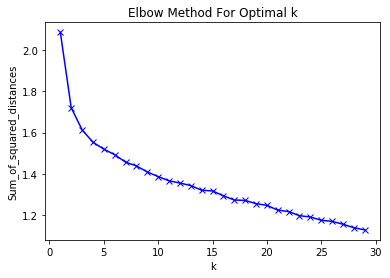

In [145]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
    
# scall the data
mms = MinMaxScaler()
mms.fit(np.row_stack([X_filterd,X_filterd_text]))

kpca = KernelPCA(kernel='sigmoid')
# data_transformed = kpca.fit(mms.transform(np.row_stack([X_filterd,X_filterd_text])))
data_transformed = np.row_stack([X_filterd,X_filterd_text]) #kpca.transform(mms.transform(np.row_stack([X_filterd,X_filterd_text])))

Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(kpca_data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [158]:
km = KMeans(n_clusters=5)
km = km.fit(data_transformed)

In [159]:
list(np.sort(km.predict(data_transformed))).count(4)

54

In [160]:
np.unique(km.predict(data_transformed))

array([0, 1, 2, 3, 4], dtype=int32)

In [161]:
l = list(np.sort(km.predict(data_transformed)))
for i in np.unique(km.predict(data_transformed)):
    print(i, l.count(i))

0 48
1 84
2 42
3 48
4 54


In [21]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, TSNE

pca = PCA(0.95)
iso = Isomap()
tsne = TSNE()

In [22]:
kpca = KernelPCA(kernel='sigmoid')

In [23]:
kpca_data = kpca.fit_transform(data_transformed)

In [25]:
kpca_data.shape

(184, 183)

In [82]:
def final_model(Xtest, km, classifiers):
    clusters = km.predict(Xtest)
    predicted = []
    
    for c, x in zip(clusters,Xtest):
        predicted.append(classifiers[c].predict(x))
        
    return np.array(predicted)

## Train the models

In [94]:
X_filterd_2 = kpca.transform(mms.transform(X_filterd))
km.predict(X_filterd_2)

array([4, 1, 1, 3, 1, 0, 2, 2, 1, 3, 3, 4, 4, 0, 1, 2, 0, 4, 0, 2, 0, 3,
       3, 3, 2, 2, 4, 0, 4, 1, 2, 0, 3, 2, 4, 3, 2, 4, 3, 4, 1, 1, 1, 2,
       4, 1, 1, 3, 0, 1, 0, 3, 1, 1, 3, 2, 1, 0, 2, 3, 0, 1, 1, 4, 1, 0,
       1, 2, 3, 0, 1, 3, 1, 2, 0, 2, 0, 4, 0, 1, 1, 3, 2, 0, 0, 1, 3, 3,
       3, 3, 4, 4, 3, 4, 3, 0, 0, 4, 0, 1, 2, 1, 1, 2, 0, 1, 3, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 0, 1, 4, 0, 4, 0, 2, 0, 2, 3, 4, 4, 1, 0, 3, 1,
       3, 1, 3, 1, 1, 4, 1, 1, 1, 1, 4, 1, 2, 1, 1, 0, 1, 3, 1, 3, 3, 1,
       1, 4, 1, 3, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 4, 0, 1, 1, 0, 1, 2, 1,
       2, 1, 0, 4, 1, 0, 3, 1], dtype=int32)

In [165]:
clusterX1 = X_filterd[km.predict(X_filterd) == 0]
clustery1 = trainY[km.predict(X_filterd) == 0]

clusterX2 = X_filterd[km.predict(X_filterd) == 1]
clustery2 = trainY[km.predict(X_filterd) == 0]

clusterX3 = X_filterd[km.predict(X_filterd) == 2]
clustery3 = trainY[km.predict(X_filterd) == 0]

clusterX4 = X_filterd[km.predict(X_filterd) == 3]
clustery4 = trainY[km.predict(X_filterd) == 0]

clusterX5 = X_filterd[km.predict(X_filterd) == 4]
clustery5 = trainY[km.predict(X_filterd) == 0]

In [166]:
from mklaren.kernel.kernel import linear_kernel, poly_kernel, matern_kernel
X = clusterX1
K_exp  = Kinterface(data=X, kernel=rbf_kernel)#,  kernel_args={"sigma": 0.0003}) # RBF kernel 
K_poly = Kinterface(data=X, kernel=poly_kernel, kernel_args={"b": 3})      # polynomial kernel with degree=3
K_lin  = Kinterface(data=X, kernel=linear_kernel)                          # linear kernel
K_mat  = Kinterface(data=X, kernel=matern_kernel)

# model = RidgeLowRank(method="nystrom", rank=5, lbd=1)
# model.fit([K_exp, K_lin, K_poly], y_tr)
# yp = model.predict([X_te, X_te, X_te])                     # The features passed to each kernel
# rmse = np.var(y_tr-yp)**0.5
# print("Test RMSE:", rmse)

In [106]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [167]:
# np.random.seed(42)
kf = KFold(n_splits=3, shuffle=True)
print(kf)  

# KFolde training helper function

def KFold_train(X,Y_train,kf,clf, metrics, print_report = False):
    kf.get_n_splits(X)
    n, d = kf.n_splits, len(metrics)
    score = np.zeros((n, d))
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]
        
        clf.fit(X_train,y_train)
        pred_y = clf.predict(X_test)
        for metric, j in zip(metrics, range(d)):
            score[i,j] = metric(y_test, pred_y)
            
        if print_report:
            print(classification_report(y_test, pred_y))
            print(score[i,:])
        i+=1
    
    return np.mean(score, axis=0)

def KFold_train_score(X, Y_train,kf,clf, metrics, print_report = False):
    kf.get_n_splits(X)
    n, d = kf.n_splits, len(metrics)
    score = np.zeros((n, d))
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]
        clf.fit(X_train,y_train)
        pred_y = clf.decision_function(X_test)
        for metric, j in zip(metrics, range(d)):
            score[i,j] = metric(y_test, pred_y)
            
        if print_report:
            print(classification_report(y_test, pred_y))
            print(score[i,:])
        i+=1
    
    return np.mean(score, axis=0)


def roubst_KCV(n_rand, X,Y_train,kf,clf, metrics, print_report = False):
    d = len(metrics)
    roubst_score = np.zeros((n_rand, d))
    for n in range(n_rand):
        roubst_score[n,:] = KFold_train(X,Y_train,kf,clf, metrics, print_report = False)
    return np.mean(roubst_score, axis=0), np.std(roubst_score, axis=0)

def roubst_KCV_score(n_rand, X,Y_train,kf,clf, metrics, print_report = False):
    d = len(metrics)
    roubst_score = np.zeros((n_rand, d))
    for n in range(n_rand):
        roubst_score[n,:] = KFold_train_score(X,Y_train,kf,clf, metrics, print_report = False)
    return np.mean(roubst_score, axis=0), np.std(roubst_score, axis=0)

KFold(n_splits=3, random_state=None, shuffle=True)


In [201]:
classifiers = []

In [396]:
X_bo = clusterX1
y_bo = clustery1.values
def black_box_function(alph, beta, epsolon, psi):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    combined_kernel = lambda x, y: \
    alph * K_exp(x, y) + beta * K_lin(x, y) + epsolon * K_poly(x, y) + psi * K_mat(x, y)
    
    svm_clf = SVC(kernel=combined_kernel)
#     np.random.seed(42)
#     m, std = roubst_KCV(5,X_filterd,trainY.values,kf, svm_clf,[accuracy_score, precision_score, recall_score])
    m, std = roubst_KCV_score(3,X_filterd,trainY.values.reshape(-1,), kf, svm_clf,[roc_auc_score])
    return m[0] #+ std[0]/2

In [397]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'alph': (0, 10), 'beta': (0, 10),'epsolon':(0,10), 'psi' : (0,10)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

In [398]:
# with matern
optimizer.maximize(
    init_points=4,
   n_iter=50,
)

|   iter    |  target   |   alph    |   beta    |  epsolon  |    psi    |
-------------------------------------------------------------------------
|  1        |  0.6571   |  4.17     |  7.203    |  0.001144 |  3.023    |
|  2        |  0.6604   |  1.468    |  0.9234   |  1.863    |  3.456    |
|  3        |  0.6514   |  3.968    |  5.388    |  4.192    |  6.852    |
|  4        |  0.6695   |  2.045    |  8.781    |  0.2739   |  6.705    |
|  5        |  0.6505   |  0.0      |  10.0     |  10.0     |  0.0      |
|  6        |  0.6918   |  0.0      |  10.0     |  3.738e-0 |  10.0     |
|  7        |  0.7001   |  0.0      |  3.755e-1 |  0.0      |  10.0     |
|  8        |  0.6995   |  10.0     |  0.0      |  2.172e-0 |  10.0     |
|  9        |  0.6685   |  9.849    |  9.623    |  0.2765   |  9.742    |
|  10       |  0.6861   |  0.08076  |  0.4831   |  9.754    |  9.905    |
|  11       |  0.6787   |  10.0     |  0.0      |  10.0     |  10.0     |
|  12       |  0.6923   |  5.753    | 

In [295]:
# with matern
optimizer.maximize(
    init_points=4,
   n_iter=50,
)

|   iter    |  target   |   alph    |   beta    |  epsolon  |    psi    |
-------------------------------------------------------------------------
|  1        |  0.6693   |  4.17     |  7.203    |  0.001144 |  3.023    |
|  2        |  0.6611   |  1.468    |  0.9234   |  1.863    |  3.456    |
|  3        |  0.6658   |  3.968    |  5.388    |  4.192    |  6.852    |
|  4        |  0.6798   |  2.045    |  8.781    |  0.2739   |  6.705    |
|  5        |  0.64     |  0.01104  |  9.79     |  9.788    |  0.7946   |
|  6        |  0.6705   |  0.4459   |  8.565    |  9.156e-0 |  10.0     |
|  7        |  0.652    |  10.0     |  10.0     |  10.0     |  10.0     |
|  8        |  0.6639   |  9.411    |  0.0      |  0.0      |  10.0     |
|  9        |  0.6471   |  9.946    |  9.805    |  0.04299  |  9.081    |
|  10       |  0.6736   |  9.075    |  0.1838   |  9.943    |  9.709    |
|  11       |  0.6345   |  0.3252   |  0.1034   |  9.941    |  9.668    |
|  12       |  0.6705   |  0.2186   | 

In [400]:
from sklearn.linear_model import LogisticRegression
svm_clf_ctest = LogisticRegression(C = 15,penalty='l1')#SVC(kernel='linear')
print(roubst_KCV_score(3,X_filterd,trainY.values, kf, svm_clf_ctest,[roc_auc_score]))
print(roubst_KCV(3,X_filterd,trainY.values,kf, svm_clf_ctest,[accuracy_score, precision_score, recall_score, f1_score]))

(array([0.65328754]), array([0.0197119]))
(array([0.60667489, 0.4299902 , 0.3623365 , 0.39064634]), array([0.0069333 , 0.0081625 , 0.01885109, 0.00919093]))


In [286]:
from sklearn.linear_model import LogisticRegression
svm_clf_ctest = LogisticRegression(C = 118,penalty='l2')#SVC(kernel='linear')

print(roubst_KCV_score(3,X_bo,y_bo, kf, svm_clf_ctest,[roc_auc_score]))

print(roubst_KCV(3,X_bo,y_bo,kf, svm_clf_ctest,[accuracy_score, precision_score, recall_score, f1_score]))

(array([0.60319665]), array([0.09832946]))
(array([0.41524217, 0.40123457, 0.43306878, 0.3625461 ]), array([0.05087485, 0.05362538, 0.02045437, 0.04169743]))


 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 /home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:Default

In [366]:
print(optimizer.max['params'])
combined_kernel = lambda x, y: \
    optimizer.max['params']['alph'] * K_exp(x, y) + optimizer.max['params']['beta'] * K_lin(x, y) + optimizer.max['params']['epsolon'] * K_poly(x, y) + \
        optimizer.max['params']['psi'] * K_mat(x, y)

# np.random.seed(42)
svm_clf = SVC(kernel=combined_kernel)
print(roubst_KCV_score(3,X_filterd,trainY.values.reshape(-1,), kf, svm_clf,[roc_auc_score]))
print(roubst_KCV(3,X_filterd,trainY.values.reshape(-1,),kf, svm_clf,[accuracy_score, precision_score, recall_score, f1_score]))

#classifiers.append(svm_clf_c1)

{'alph': 6.942154056760877e-08, 'beta': 5.933450560392232e-08, 'epsolon': 1.1105166190257514e-07, 'psi': 9.999999974865624}
(array([0.71050624]), array([0.0053059]))
(array([0.66305306, 0.57389527, 0.35631928, 0.42451853]), array([0.02312153, 0.05311417, 0.02657813, 0.03505065]))


In [409]:
optimizer.max['params'] = {'alph': 6.942154056760877e-08, 'beta': 5.933450560392232e-08, 'epsolon': 1.1105166190257514e-07, 'psi': 9.999999974865624}

In [418]:
print(optimizer.max['params'])
combined_kernel = lambda x, y: \
    optimizer.max['params']['alph'] * K_exp(x, y) + optimizer.max['params']['beta'] * K_lin(x, y) + optimizer.max['params']['epsolon'] * K_poly(x, y) + \
        optimizer.max['params']['psi'] * K_mat(x, y)

# np.random.seed(42)
svm_clf = SVC(kernel=combined_kernel)
print(roubst_KCV_score(3,X_filterd,trainY.values.reshape(-1,), kf, svm_clf,[roc_auc_score]))
print(roubst_KCV(3,X_filterd,trainY.values.reshape(-1,),kf, svm_clf,[accuracy_score, precision_score, recall_score, f1_score]))

#classifiers.append(svm_clf_c1)

{'alph': 0.0, 'beta': 5.31601858216006, 'epsolon': 5.486388593005169, 'psi': 2.514323663646085}
(array([0.70309576]), array([0.03548967]))
(array([0.63746401, 0.50007059, 0.48316351, 0.47277581]), array([0.01424263, 0.03436548, 0.02661623, 0.02318942]))


In [367]:
svm_clf.decision_function(X_filterd_text)

array([-0.40774505, -0.50065599, -0.48972485, -0.47386958, -0.16760884,
       -0.27428334, -0.63549145, -0.75550092,  0.06098039, -0.28449237,
       -0.06094927, -0.38514805, -0.36105418, -0.59527636, -0.11194332,
       -0.39772642,  0.18314364, -0.88580041,  0.22516719, -0.63728761,
        0.18231537, -0.61975114, -0.22771238, -0.09225271, -0.24202716,
       -0.50386717,  0.06489015, -0.34031169, -0.09956924, -0.36795204,
       -0.09851486, -0.21097224, -0.61340389, -0.58811961, -0.53808674,
       -0.29704636, -0.11506851, -0.51689655, -0.6884562 , -0.55951483,
       -0.68402555,  0.0819343 ,  0.40561343, -0.76955493, -0.62630225,
        0.13158044, -0.46215396, -0.77562788, -0.61148685, -0.39687465,
        0.16222648,  0.22078814, -0.53198046, -0.10088742, -0.11883676,
        0.23640442, -0.41525261, -0.60828649, -0.88065495, -0.36754094,
       -0.27928251, -0.19927359, -0.30411894, -0.30849065, -0.13271905,
        0.05701032, -0.60358918, -0.37994659, -0.15946902, -0.08

In [382]:
svm_clf.decision_function(X_filterd_text)

array([18572075.50604047, 17013737.60923706, 17197078.92058172,
       17463009.79763185, 22599731.63323701, 20810545.8138045 ,
       14752226.05957939, 12739380.50721895, 26433717.45267463,
       20639316.31033388, 24388666.31552832, 18951081.1785447 ,
       19355193.10503191, 15426728.6227912 , 23533374.58174558,
       18740111.90870101, 28482686.87829151, 10553948.5423911 ,
       29187521.35083737, 14722100.0130118 , 28468795.13584866,
       15016228.34102722, 21591651.83950079, 23863634.09575476,
       21351558.94760764, 16959878.69439243, 26499294.16358549,
       19703093.83144042, 23740917.89219699, 19239499.19033279,
       23758603.08491017, 21872424.51900405, 15122686.99300062,
       15546764.64143418, 16385935.07233873, 20428756.34729159,
       23480958.23087277, 16741345.04970372, 13863880.60775662,
       16026534.81060553, 13938193.53420875, 26785165.44186053,
       32214035.88430582, 12503662.13571029, 14906350.37776159,
       27617848.93526332, 17659508.90767